# Les √©tudiant.e.s d'informatiques face √† la situation sanitaire 

## Introduction


Ce notebook pr√©sentera rapidement les r√©sultats d'un sondage men√© parmis les √©tudiant.e.s d'informatique par l'association __IP7__, suite √† une augmentation des t√©moignages faisant part d'un mal √™tre et d'un sentiment d'abandon grandissant. 

Ce notebook a √©t√© r√©alis√© par Marie B√©tend en collaboration avec d'autres membres de l'association IP7. Les versions actualis√©es seront trouvables sur le [d√©pot github de l'association ](https://github.com/IP7/R-sultats-sondages/tree/main/Etu-SituationSanitaire) [IP7](http://ip7.informatique.univ-paris-diderot.fr:8080/).
Si vous √™tes un.e √©tudiant.e de l'universit√© de Paris vous pouvez r√©pondre au sondage [ici](https://framaforms.org/les-etudiantes-dinformatiques-face-a-la-situation-sanitaire-1612121460).

Nous esp√©rons que ces r√©sultats pourrons aider l'ensemble de l'√©quipe enseignante √† prendre conscience de la r√©alit√© que les √©tudiant.e.s traversent depuis plusieurs mois, et fournir des clefs qui permettront d'am√©liorer cette situation.

## R√©cup√©ration des r√©sultats et traitement

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML,  Markdown
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

tmp = range(37)
data = pd.read_csv('etu.tsv', delimiter = '\t', header = 2, usecols = tmp[-36:])

In [3]:
def to_category(df, labels):
    for e in labels:
        df[e] = df[e].astype('category')

def reorder_cat(df, labels, newOrder):
    for e in labels :
        if 'Ne souhaite pas r√©pondre' not in data[e].cat.categories :
            data[e].cat.add_categories(['Ne souhaite pas r√©pondre'], inplace = True)
        data[e].cat.reorder_categories(ordre, inplace = True)

In [4]:
lab = ["Vous √™tes ",
       "En quelle ann√©e √™tes-vous ?",
       "Vous sentez-vous √©panoui(e) dans vos √©tudes ?",
       "Avez-vous ressenti une baisse de motivation au cours de ces derniers mois ?",
       "Avez-vous ressenti l'envie d'arr√™ter vos √©tudes? ",
       "Avez-vous consult√© un(e) psychologue ou un(e) psychiatre suite √† des difficult√©s li√©es √† la situation sanitaire ?",
       "Si vous-m√™me demain, √©tiez concern√©(e) par l‚Äôapparition d‚Äôun trouble mental, et que vous ressentiez le besoin de consulter et d‚Äô√™tre pris(e) en charge, sauriez-vous √† qui vous adresser ?",
       "Vous sentez-vous isol√©(e) socialement ?",
       "Selon vous, le bien-√™tre des √©tudiant(e)s est-il mis de c√¥t√© ? ",
       "Un sentiment de nervosit√©, d‚Äôanxi√©t√© ou de tension",
       "Une tendance √† √™tre facilement contrari√©(e) ou irritable",
       "Des difficult√©s √† se d√©tendre",
       "Une inqui√©tude excessive √† propos de diff√©rentes choses",
       "Une incapacit√© √† arr√™ter de s‚Äôinqui√©ter ou √† contr√¥ler ses inqui√©tudes",
       "Une agitation telle qu‚Äôil est difficile de tenir en place",
       "Un sentiment de peur comme si quelque chose de terrible risquait de se produire",
       "Vous sentir fatigu√©(e) ou avoir peu d‚Äô√©nergie ",
       "Difficult√©s √† vous endormir, √† rester endormi ou trop dormir",
       "Vous sentir triste, d√©prim√©(e) ou d√©sesp√©r√©(e)",
       "Avoir peu d'app√©tit ou trop d'app√©tit",
       "Peu d'int√©r√™t ou de plaisir √† faire les choses",
       "Mauvaise perception de vous-m√™me, vous pensez que vous √™tes un(e) perdant(e) ou que vous n'avez pas satisfait vos propres attentes ou celles de votre famille",
       "Difficult√©s √† vous concentrer sur des choses telles que lire le journal ou regarder la t√©l√©vision",
       "Vous bougez ou vous parlez si lentement que les autres personnes ont pu le remarquer. Ou, au contraire, vous √™tes si agit√©(e) que vous bougez beaucoup plus que d'habitude",
       "Vous avez pens√© que vous seriez mieux mort(e) ou vous avez pens√© √† vous blesser d'une fa√ßon ou d'une autre",
       "Consid√©rez-vous que les modalit√©s d‚Äôenseignement actuelles permettent une formation correcte ?",
       "Etes-vous favorable √† une r√©ouverture des facult√©s et des amphith√©√¢tres ?",
       "Si les facs r√©ouvraient 1 jour par semaine, seriez-vous en mesure de vous rendre en cours en pr√©sentiel ? ",
       "Avez-vous d√ª changer de logement √† cause de la situation sanitaire ?",
       "Avez-vous b√©n√©fici√© d'une aide alimentaire avant le premier confinement ?",
       "Avez-vous eu besoin d'une aide alimentaire depuis le d√©but de la crise sanitaire ?"]
to_category(data, lab)


In [5]:
qIpsos = ["Un sentiment de nervosit√©, d‚Äôanxi√©t√© ou de tension",
       "Une tendance √† √™tre facilement contrari√©(e) ou irritable",
       "Des difficult√©s √† se d√©tendre",
       "Une inqui√©tude excessive √† propos de diff√©rentes choses",
       "Une incapacit√© √† arr√™ter de s‚Äôinqui√©ter ou √† contr√¥ler ses inqui√©tudes",
       "Une agitation telle qu‚Äôil est difficile de tenir en place",
       "Un sentiment de peur comme si quelque chose de terrible risquait de se produire",
       "Vous sentir fatigu√©(e) ou avoir peu d‚Äô√©nergie ",
       "Difficult√©s √† vous endormir, √† rester endormi ou trop dormir",
       "Vous sentir triste, d√©prim√©(e) ou d√©sesp√©r√©(e)",
       "Avoir peu d'app√©tit ou trop d'app√©tit",
       "Peu d'int√©r√™t ou de plaisir √† faire les choses",
       "Mauvaise perception de vous-m√™me, vous pensez que vous √™tes un(e) perdant(e) ou que vous n'avez pas satisfait vos propres attentes ou celles de votre famille",
       "Difficult√©s √† vous concentrer sur des choses telles que lire le journal ou regarder la t√©l√©vision",
       "Vous bougez ou vous parlez si lentement que les autres personnes ont pu le remarquer. Ou, au contraire, vous √™tes si agit√©(e) que vous bougez beaucoup plus que d'habitude",
       "Vous avez pens√© que vous seriez mieux mort(e) ou vous avez pens√© √† vous blesser d'une fa√ßon ou d'une autre" ]
ordre = ['Ne souhaite pas r√©pondre', 'Jamais',  'Plusieurs jours', 'Plus de la moiti√© du temps', 'Presque tous les jours']


reorder_cat(data, qIpsos, ordre)

In [6]:
data["Vous sentez-vous √©panoui(e) dans vos √©tudes ?"].cat.rename_categories({1: ' 1 = Pas du tout',
                                                                             2: '2 = Pas vraiment',
                                                                             3: '3 = Neutre',
                                                                            4: '4 = Plut√¥t oui',
                                                                            5 : '5 = Tr√®s fortement'}, inplace = True)
data["Avez-vous ressenti une baisse de motivation au cours de ces derniers mois ?"].cat.reorder_categories(['Non', 'Oui un peu', 'Oui beaucoup'], inplace = True)

data["Si vous-m√™me demain, √©tiez concern√©(e) par l‚Äôapparition d‚Äôun trouble mental, et que vous ressentiez le besoin de consulter et d‚Äô√™tre pris(e) en charge, sauriez-vous √† qui vous adresser ?"].cat.reorder_categories(['Ne souhaite pas r√©pondre', 'Non, pas du tout', 'Non, plutot pas',  'Oui, √† peu pr√®s','Oui, tout √† fait'], inplace=True)
qOui = ["Vous sentez-vous isol√©(e) socialement ?",
       "Selon vous, le bien-√™tre des √©tudiant(e)s est-il mis de c√¥t√© ? ",
       "Consid√©rez-vous que les modalit√©s d‚Äôenseignement actuelles permettent une formation correcte ?"]
ordre =  ['Ne souhaite pas r√©pondre', 'Non pas du tout', 'Non pas trop', 'Oui plut√¥t', 'Oui beaucoup']
reorder_cat(data, qOui, ordre)

data["Avez-vous d√ª changer de logement √† cause de la situation sanitaire ?"].cat.reorder_categories(['Ne souhaite pas r√©pondre', 'Non', 'Oui une fois', 'Oui plusieurs fois'], inplace = True)
data["Si les facs r√©ouvraient 1 jour par semaine, seriez-vous en mesure de vous rendre en cours en pr√©sentiel ? "].cat.reorder_categories(['Ne souhaite pas r√©pondre',  'Non', 'Ne sait pas encore', 'Oui'], inplace = True)

In [7]:
for e in lab :
    data[e].cat.remove_unused_categories(inplace = True)

In [8]:
from math import isnan
def perc_hue(plot, feature, hue):
    numCat = data[feature].nunique()
    numHue = data[hue].nunique()
    patch = [p for p in plot.patches]
    
    a = [p.get_height() for p in patch]
    
    for i in range(numCat):
        total = data[feature].value_counts(sort=False).values[i]
        for j in range(numHue):
            percentage = '{:.1f}%'.format(100 * a[(j*numCat + i)]/total)
            x = patch[(j*numCat + i)].get_x() + patch[(j*numCat + i)].get_width() / 2 - 0.08
            y = patch[(j*numCat + i)].get_y() + patch[(j*numCat + i)].get_height() /2
            plot.annotate(percentage, (x, y), size = 12, color='black')

def perc_no_hue(plot, feature):
    total = len(data[feature])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.25*p.get_width()
        y = p.get_y() + p.get_height()/2
        plot.annotate(percentage, (x, y), color='black')

In [9]:
import matplotlib.pyplot as plt
sns.set() 

def plot_both(x,y) :
    fig = plt.figure(figsize=(28,7))
    grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.3)

    ax1 = fig.add_subplot(grid[0,1:])
    ax1.title.set_text('En distinguant les ann√©es')
    plot = sns.countplot(ax = ax1,x=y, hue=x, data=data)
    plot.set_xlabel("")
    plot.set_ylabel("Nombre d'√©tudiant.e.s")
    perc_hue(plot, y,x )
    
    ax2 = fig.add_subplot(grid[0,0])
    ax2.title.set_text('Toutes ann√©es confondues')
    plot2 = sns.countplot(ax = ax2, x=x, data=data)
    perc_no_hue(plot2,x)
    plot2.set_xlabel("")
    plot2.set_ylabel("Nombre d'√©tudiant.e.s")
    labels = list(data[x].cat.categories)
    plot2.set_xticklabels(labels, fontsize=14, rotation=30, ha= 'right');
    
    fig.suptitle(x, fontsize = 17)
    

## R√©sultats 

Commen√ßons par le nombre de r√©sultats recueillis depuis la mise en ligne du sondage le 01 f√©vrier 2021.

In [10]:
len(data)

143

Observons √©galement rapidement la proportion des √©tudiant.e.s de chaque ann√©e ayant r√©pondu.

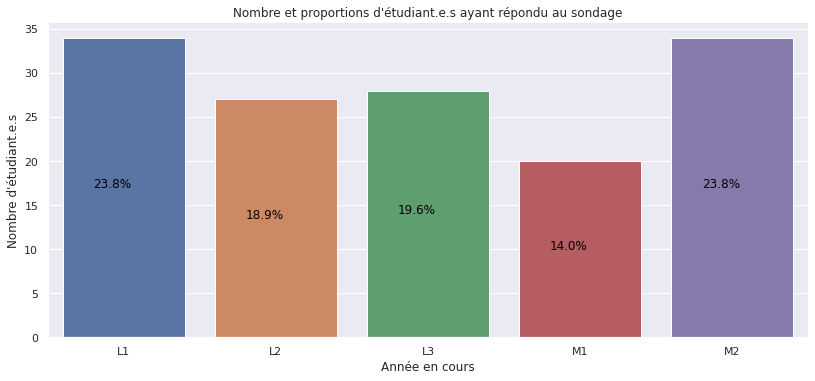

In [11]:
plot = sns.catplot(x="En quelle ann√©e √™tes-vous ?", kind="count", data=data, aspect=18/8)
plot.set_axis_labels("Ann√©e en cours", "Nombre d'√©tudiant.e.s")
plot.ax.set_title('Nombre et proportions d\'√©tudiant.e.s ayant r√©pondu au sondage')
perc_no_hue(plot.ax , "En quelle ann√©e √™tes-vous ?")

### Ressenti des √©tudiant.e.s


####  Troubles anxieux

Les questions qui suivent proviennent de [cette √©tude de l'IPSOS : "PERCEPTIONS ET REPR√âSENTATIONS DES MALADIES MENTALES AVEC L‚ÄôURGENCE SANITAIRE, L‚ÄôURGENCE PSYCHIATRIQUE FOCUS JEUNES 18-24 ANS"](https://www.ipsos.com/sites/default/files/ct/news/documents/2021-01/ipsos_rapport_fondamental_focus_jeunes_0.pdf), r√©alis√©e en janvier 2021.

L'√©nonc√© √©tait : " _Dans le contexte de la Covid-19, √† quelle fr√©quence avez-vous √©t√© g√™n√©(e) par les probl√®mes suivants dans les deux derni√®res semaines ?_ "

In [12]:
qIpsosAnx = ["Un sentiment de nervosit√©, d‚Äôanxi√©t√© ou de tension",
       "Une tendance √† √™tre facilement contrari√©(e) ou irritable",
       "Des difficult√©s √† se d√©tendre",
       "Une inqui√©tude excessive √† propos de diff√©rentes choses",
       "Une incapacit√© √† arr√™ter de s‚Äôinqui√©ter ou √† contr√¥ler ses inqui√©tudes",
       "Une agitation telle qu‚Äôil est difficile de tenir en place",
       "Un sentiment de peur comme si quelque chose de terrible risquait de se produire"]
qIpsosDepr = ["Vous sentir fatigu√©(e) ou avoir peu d‚Äô√©nergie ",
       "Difficult√©s √† vous endormir, √† rester endormi ou trop dormir",
       "Vous sentir triste, d√©prim√©(e) ou d√©sesp√©r√©(e)",
       "Avoir peu d'app√©tit ou trop d'app√©tit",
       "Peu d'int√©r√™t ou de plaisir √† faire les choses",
       "Mauvaise perception de vous-m√™me, vous pensez que vous √™tes un(e) perdant(e) ou que vous n'avez pas satisfait vos propres attentes ou celles de votre famille",
       "Difficult√©s √† vous concentrer sur des choses telles que lire le journal ou regarder la t√©l√©vision",
       "Vous bougez ou vous parlez si lentement que les autres personnes ont pu le remarquer. Ou, au contraire, vous √™tes si agit√©(e) que vous bougez beaucoup plus que d'habitude",
       "Vous avez pens√© que vous seriez mieux mort(e) ou vous avez pens√© √† vous blesser d'une fa√ßon ou d'une autre"]

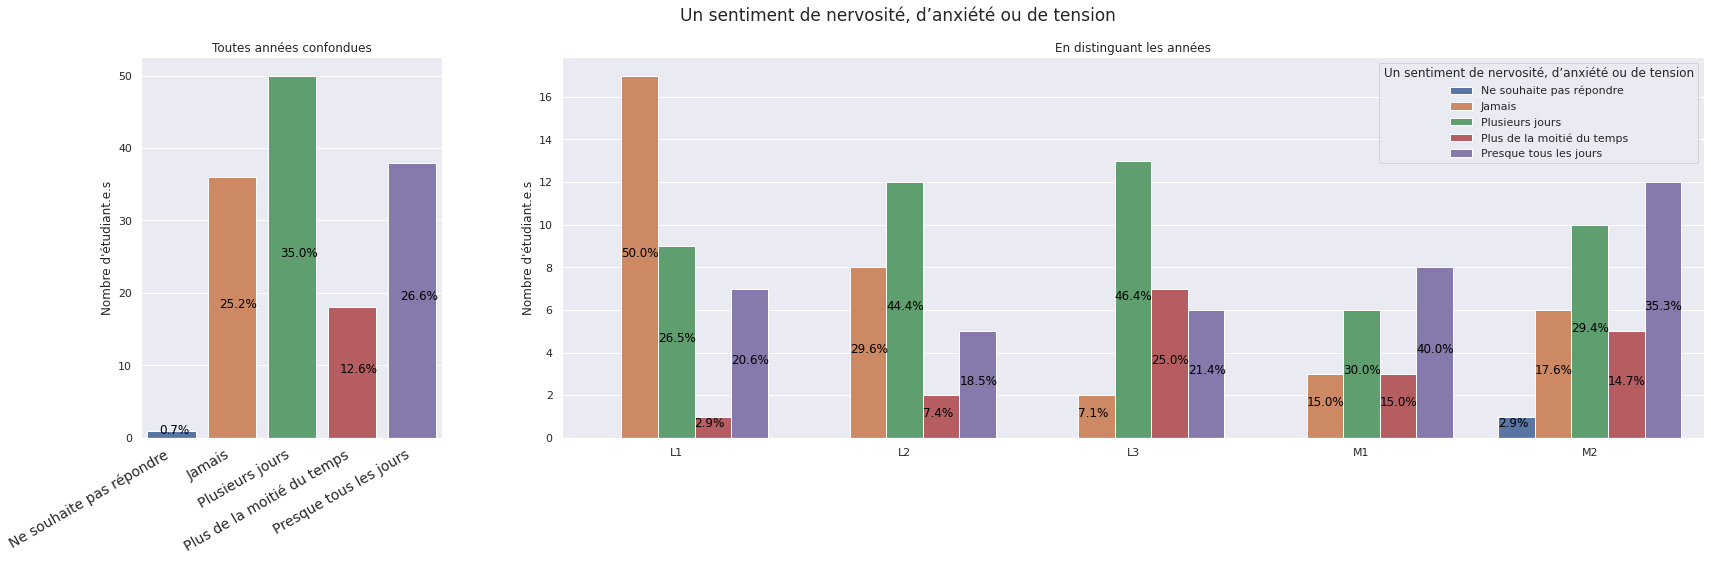

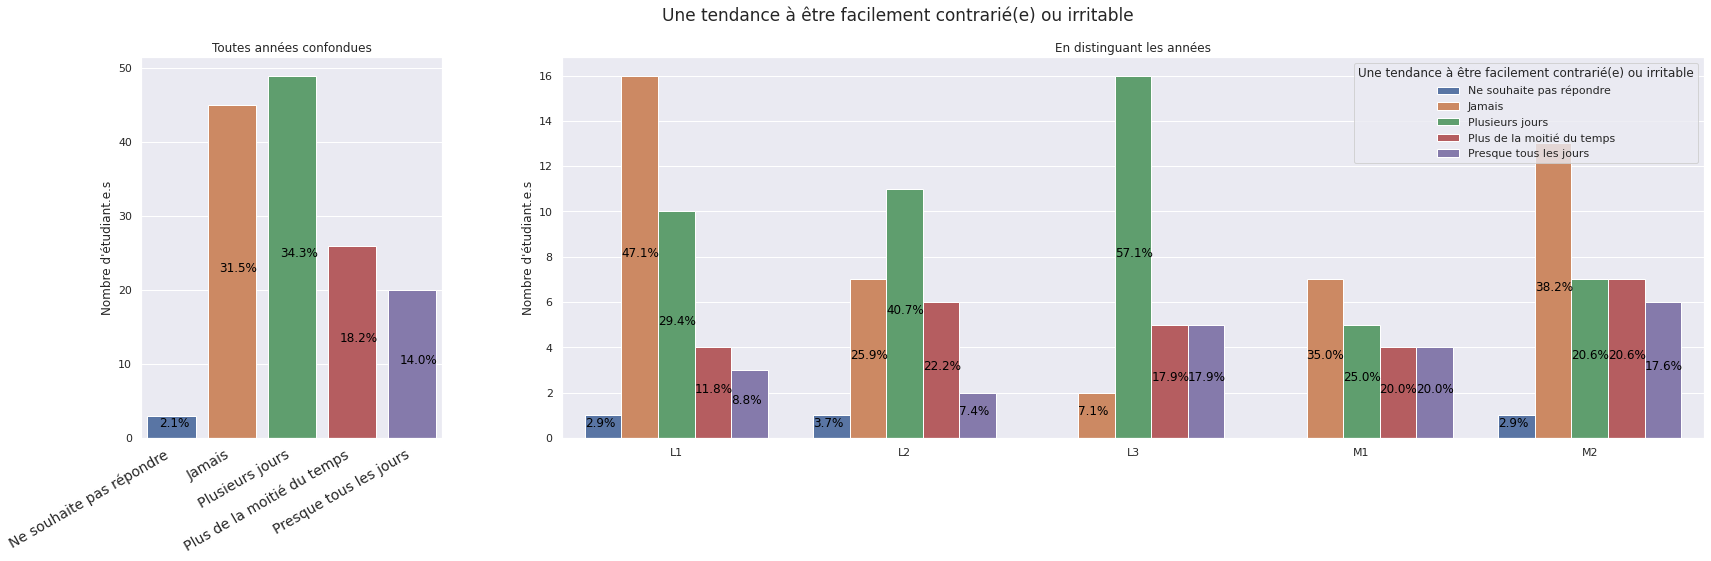

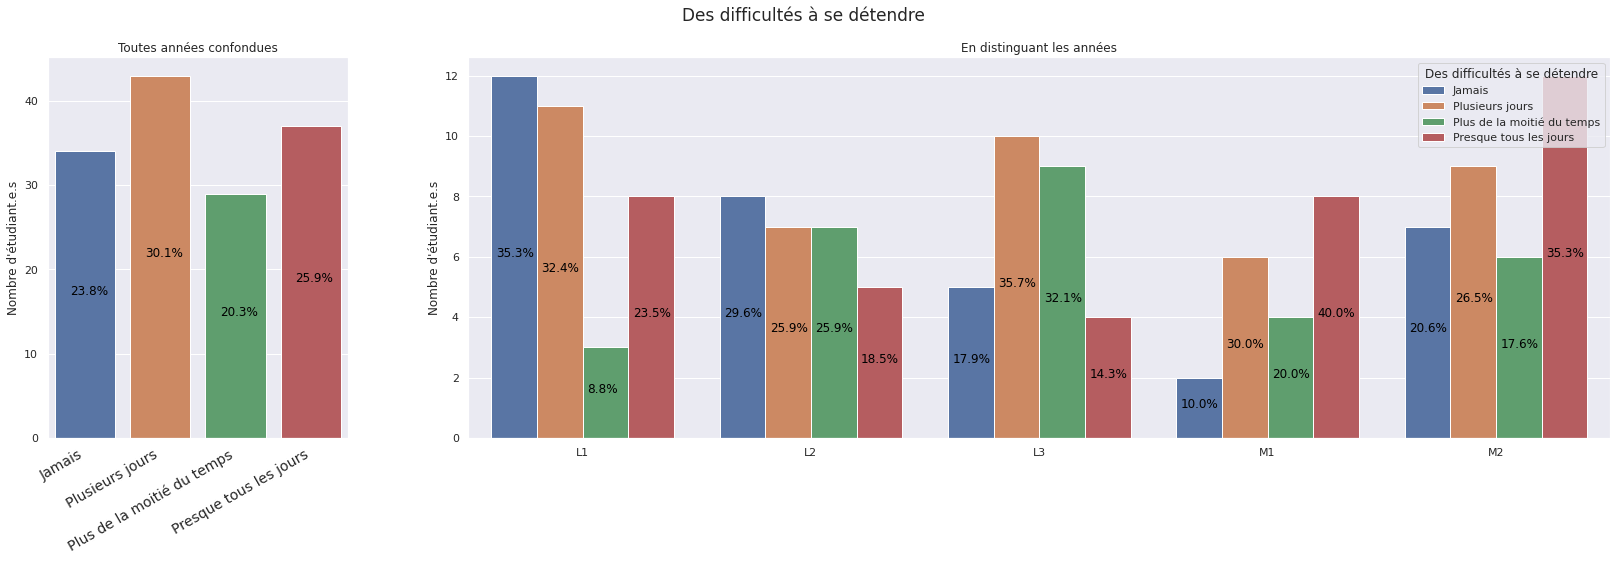

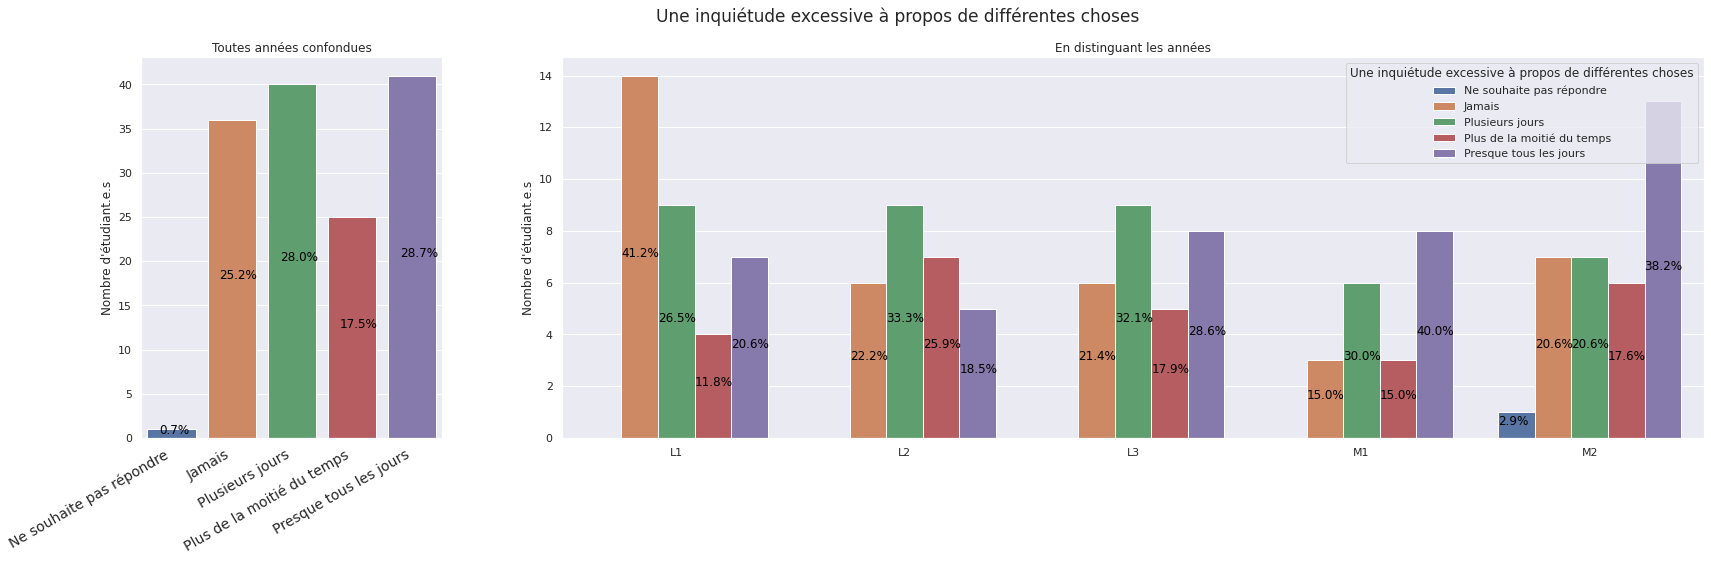

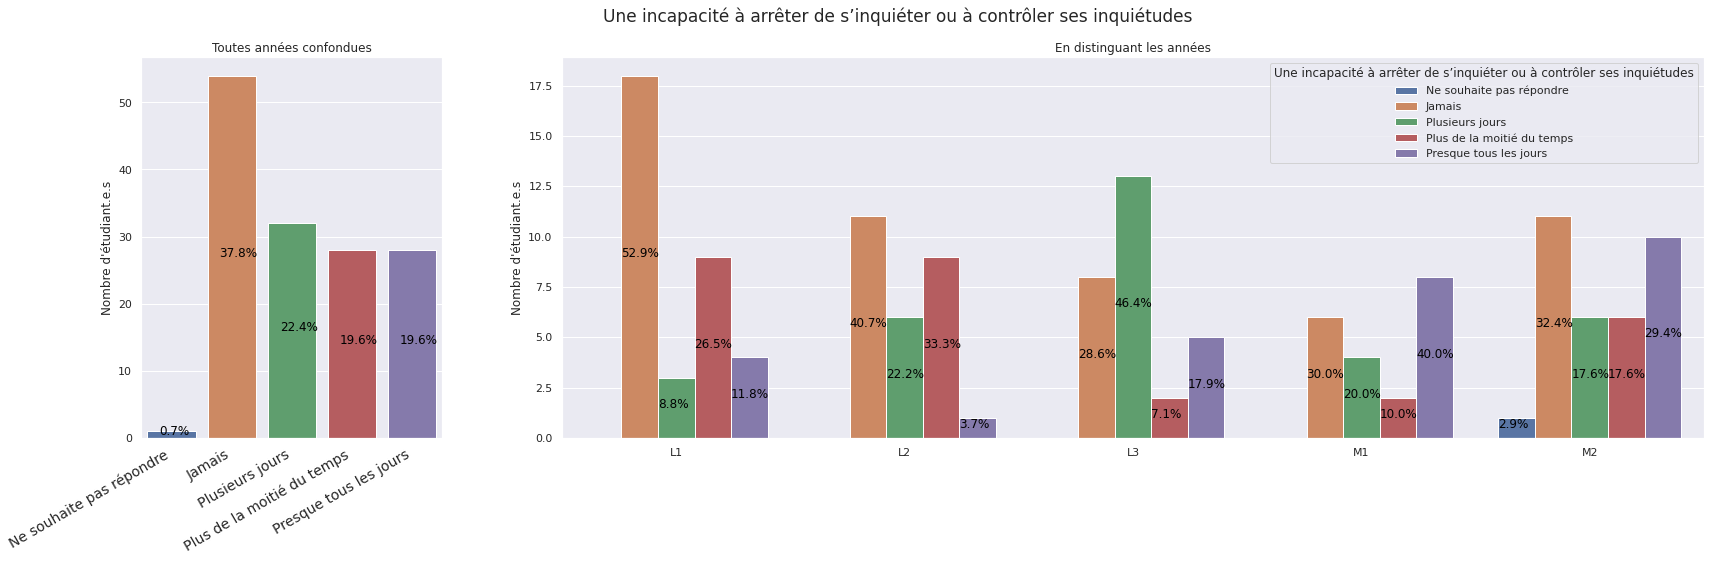

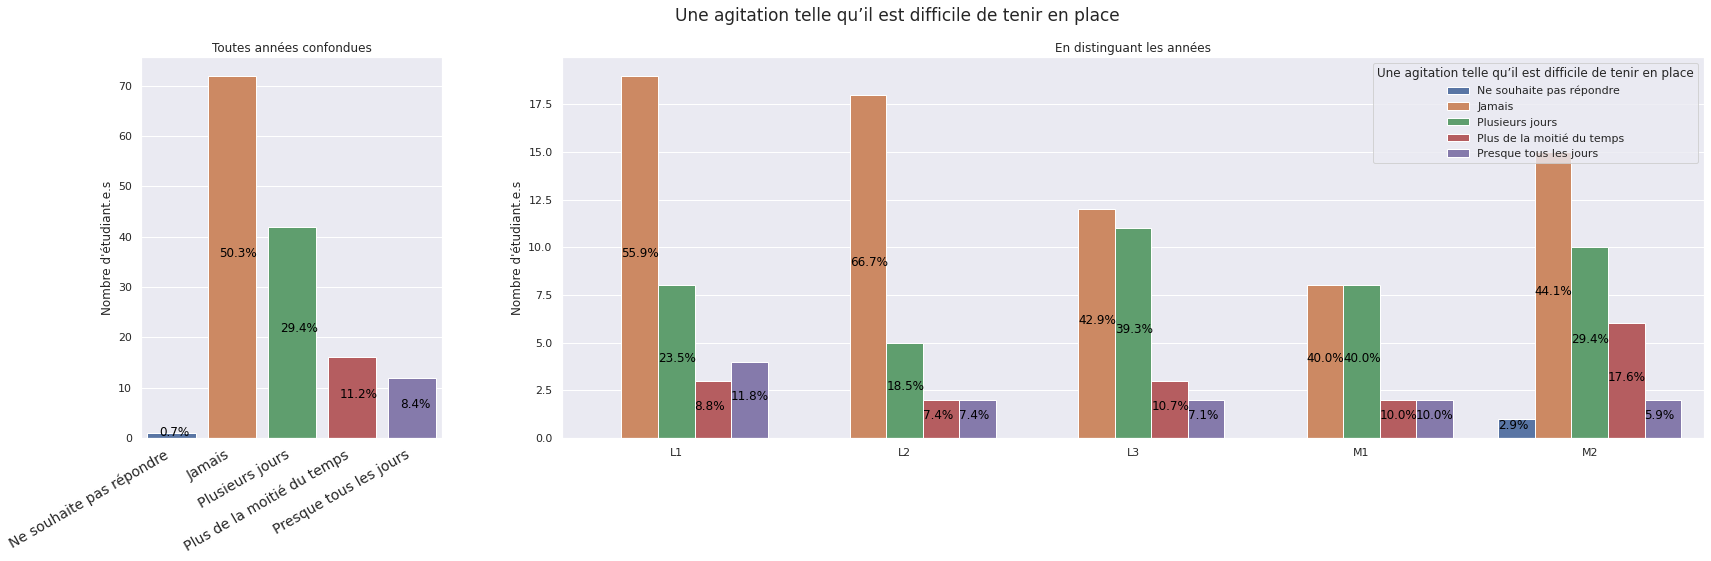

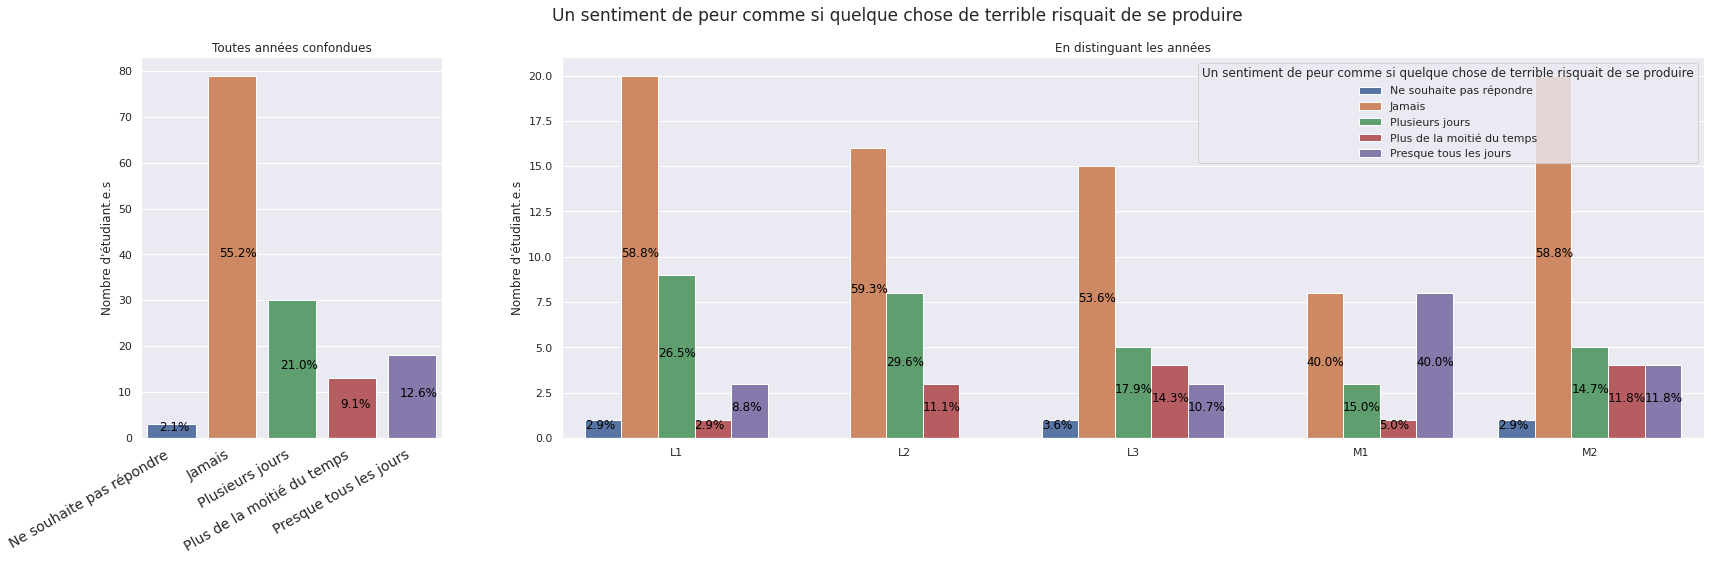

In [13]:
for i in qIpsosAnx :
    plot_both(i,"En quelle ann√©e √™tes-vous ?")

#### Troubles d√©pr√©ssifs

√Ä nouveau les questions de cette section proviennent de l'[√©tude de l'IPSOS pr√©c√©demment cit√©e](https://www.ipsos.com/sites/default/files/ct/news/documents/2021-01/ipsos_rapport_fondamental_focus_jeunes_0.pdf).

L'√©nonc√© √©tait : " _Dans le contexte de la Covid-19, √† quelle fr√©quence avez-vous √©t√© g√™n√©(e) par les probl√®mes suivants dans les deux derni√®res semaines ?_ "

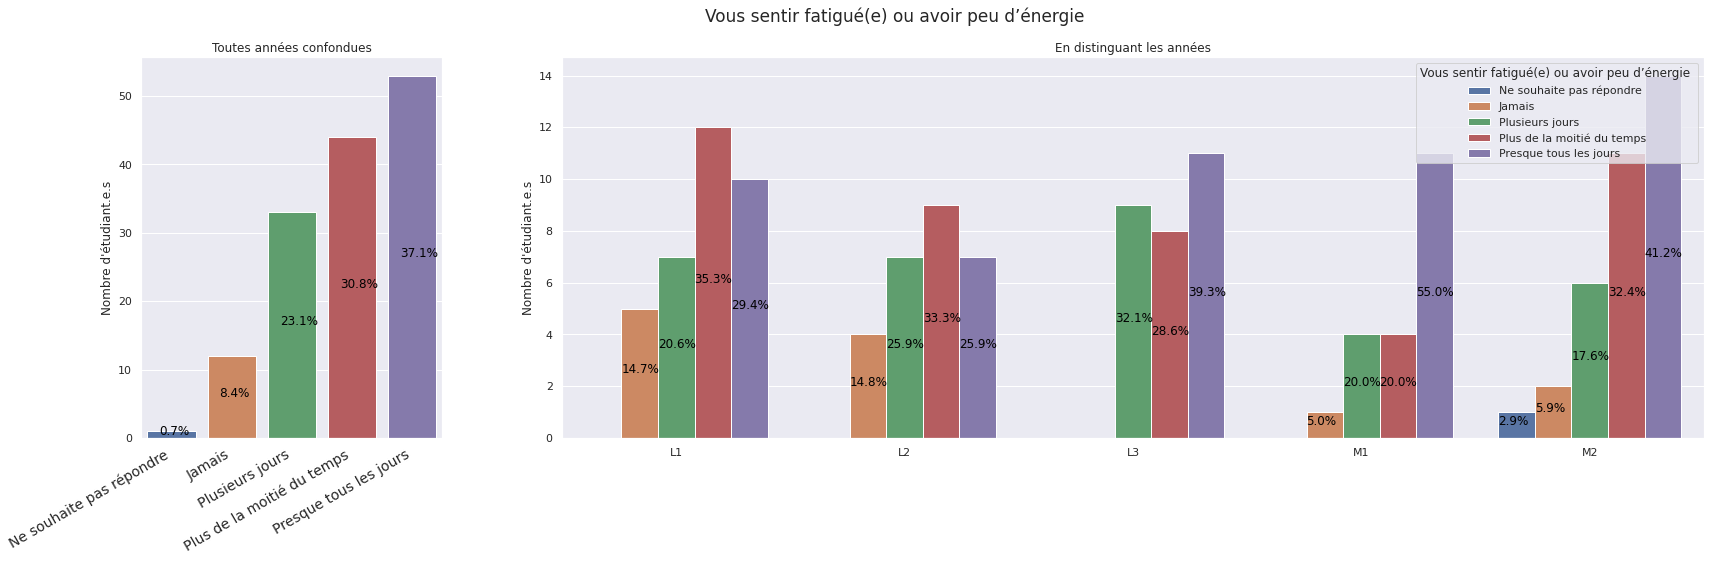

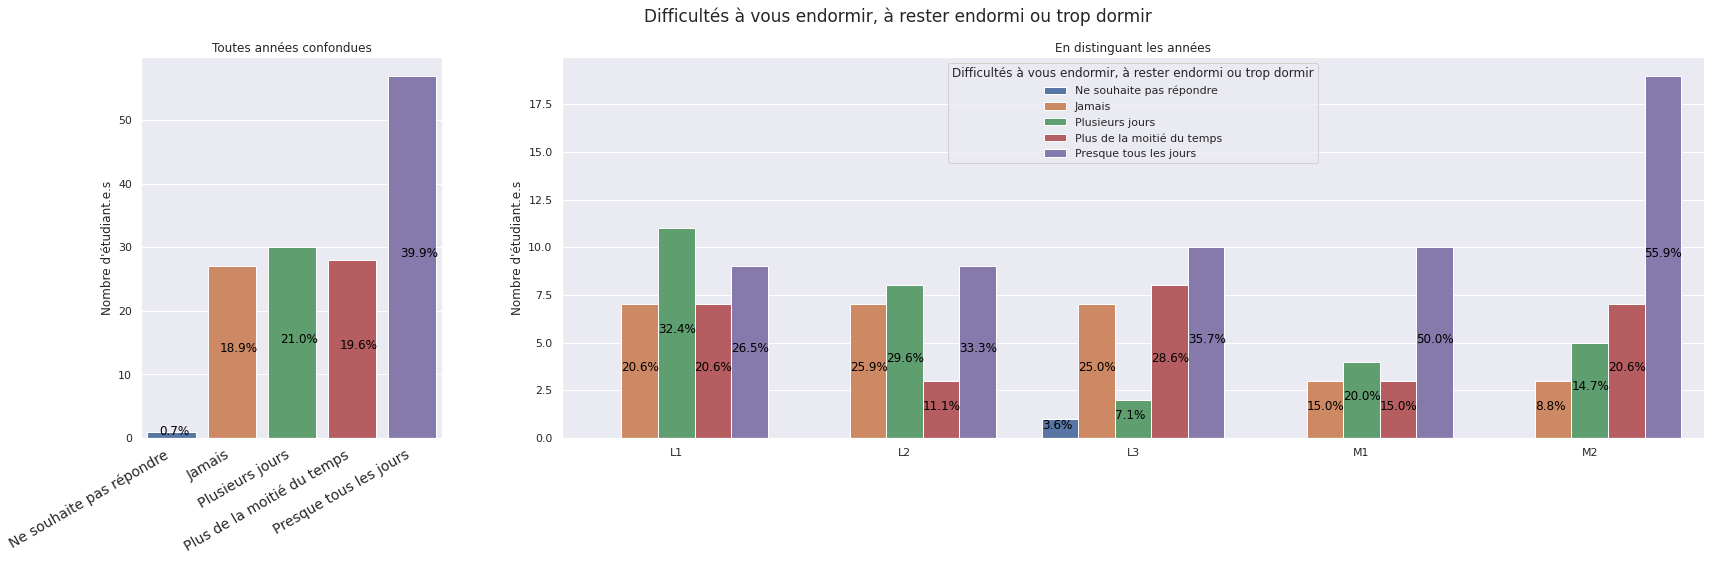

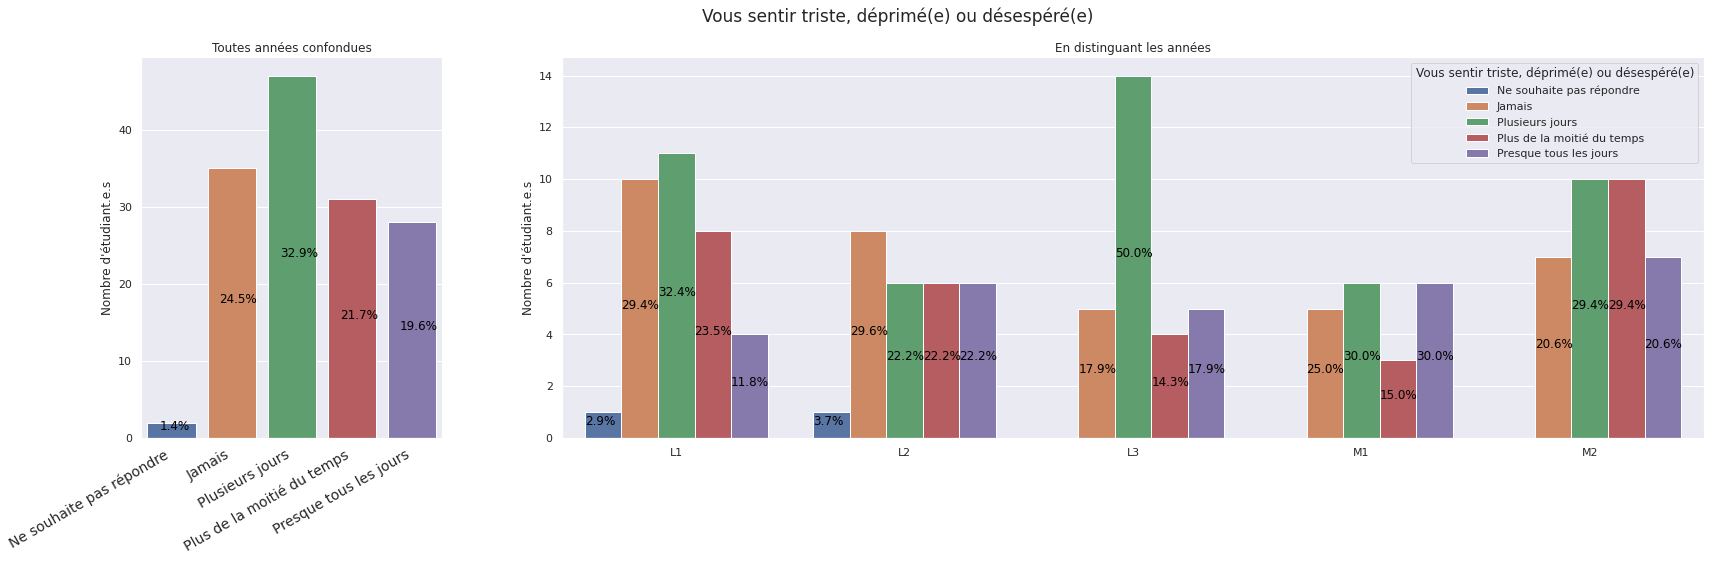

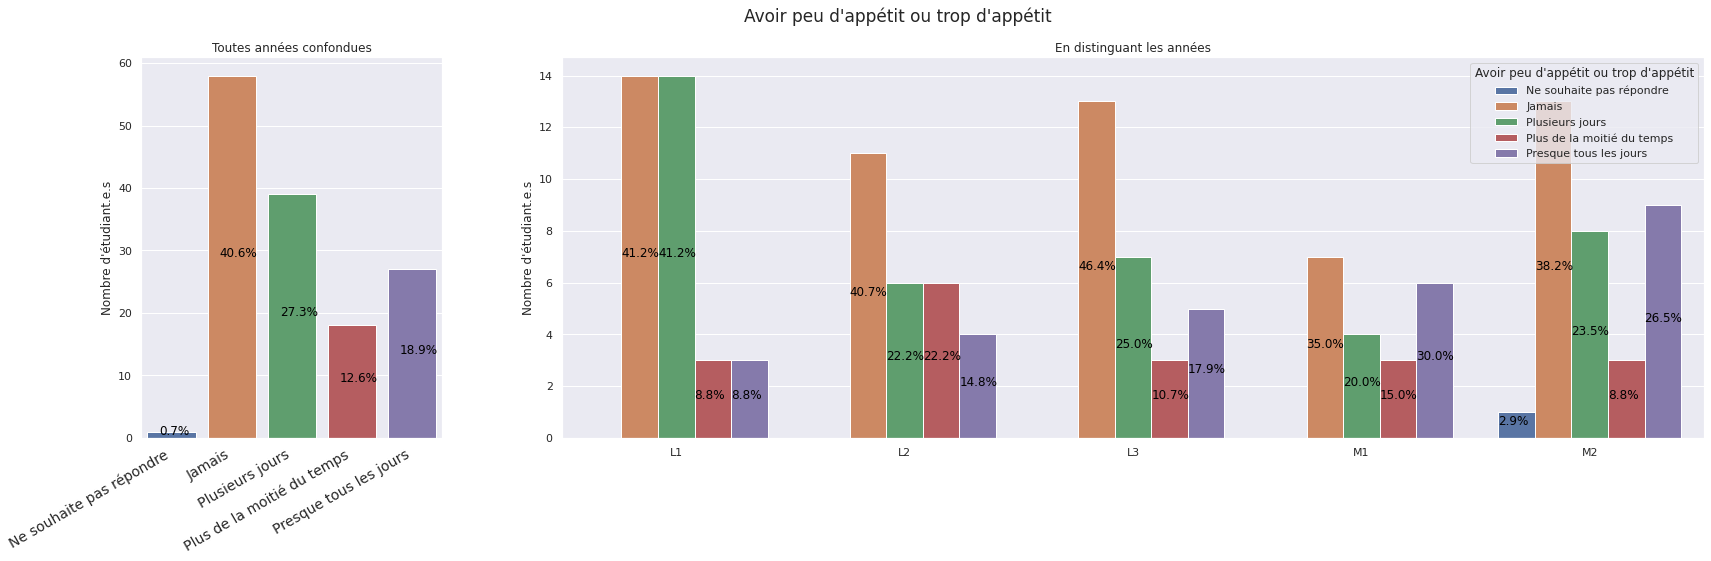

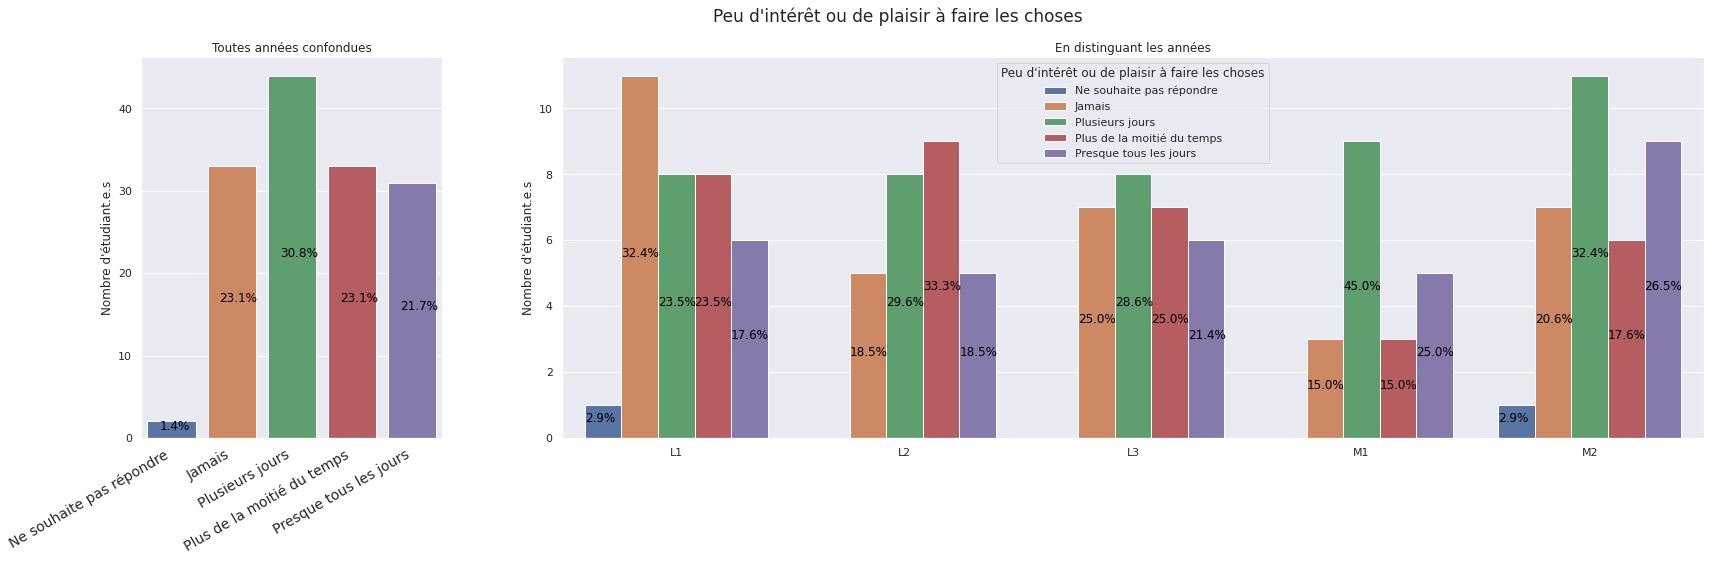

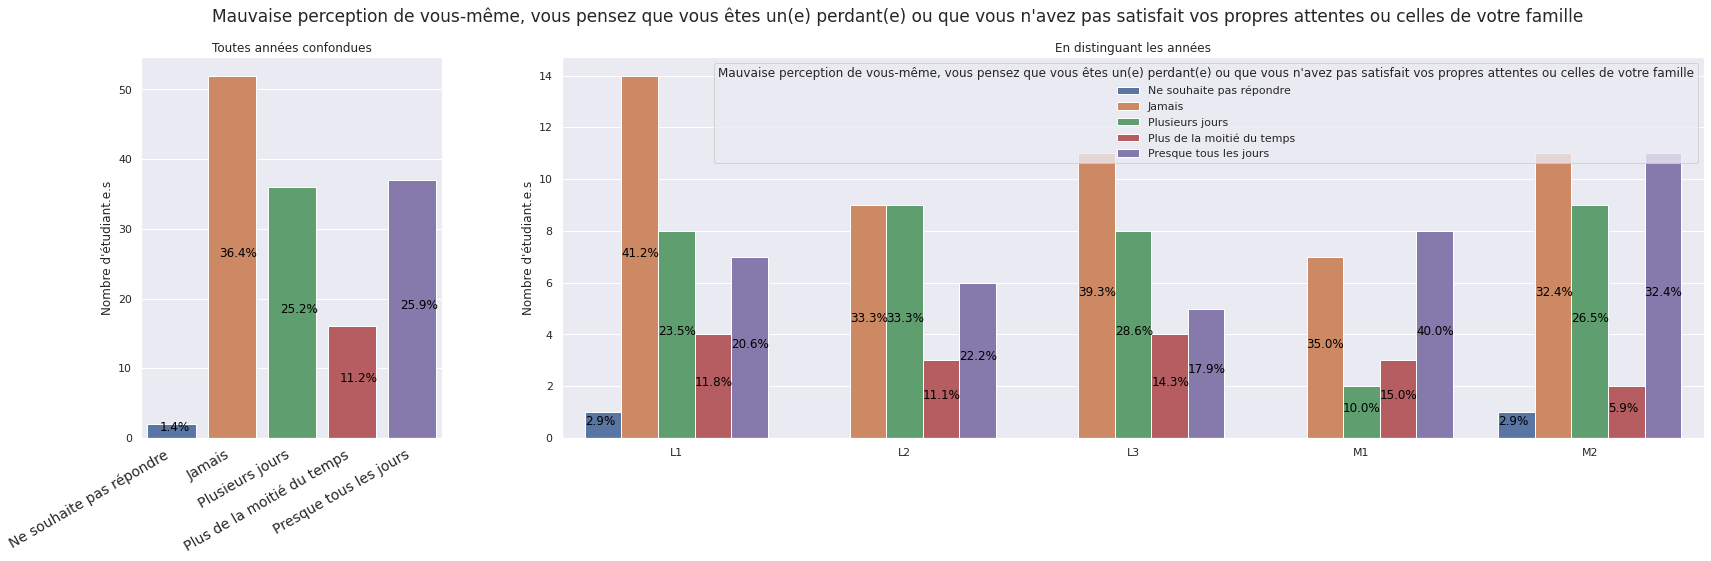

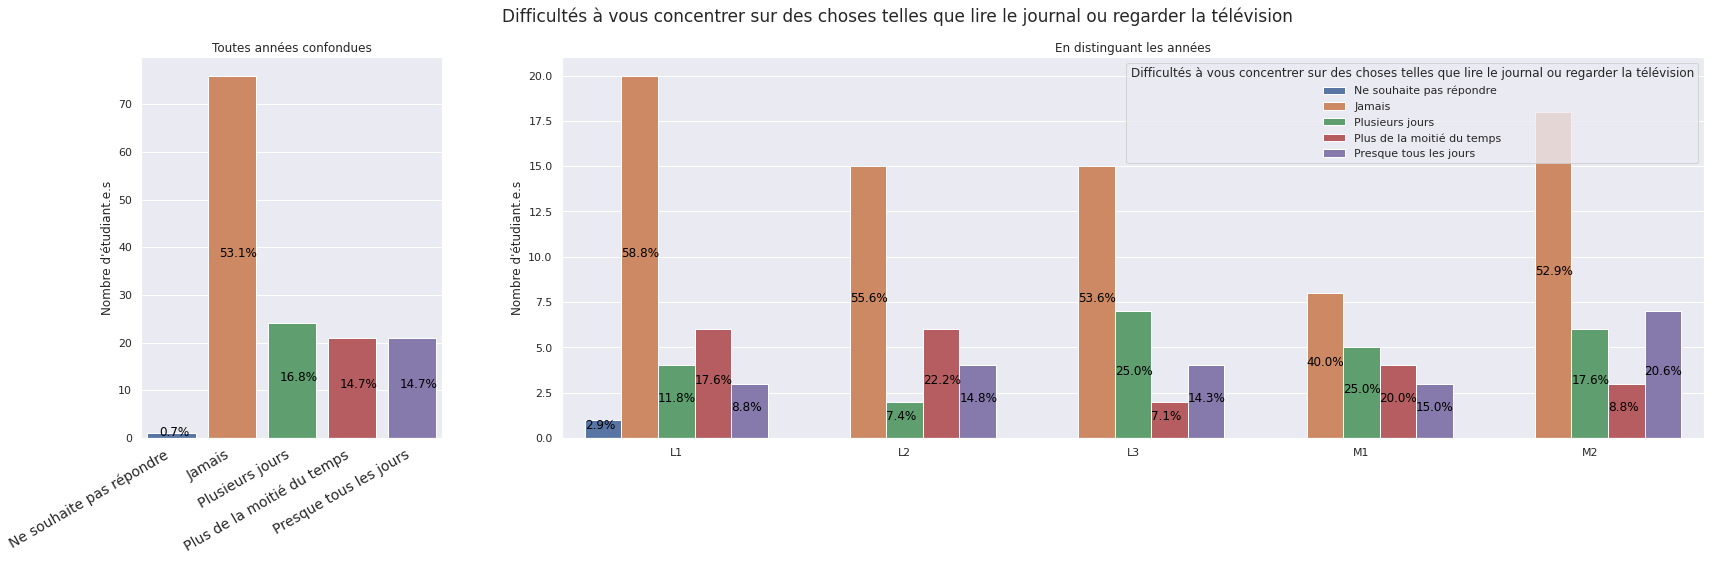

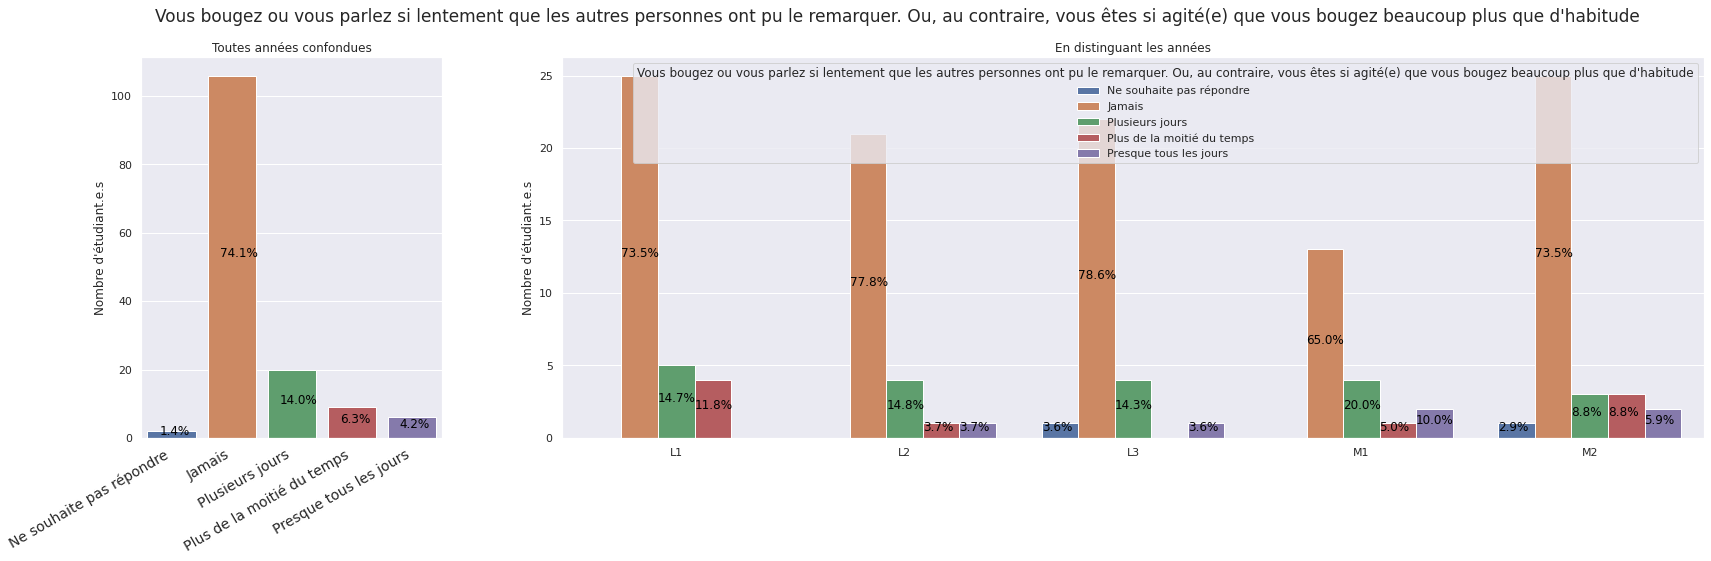

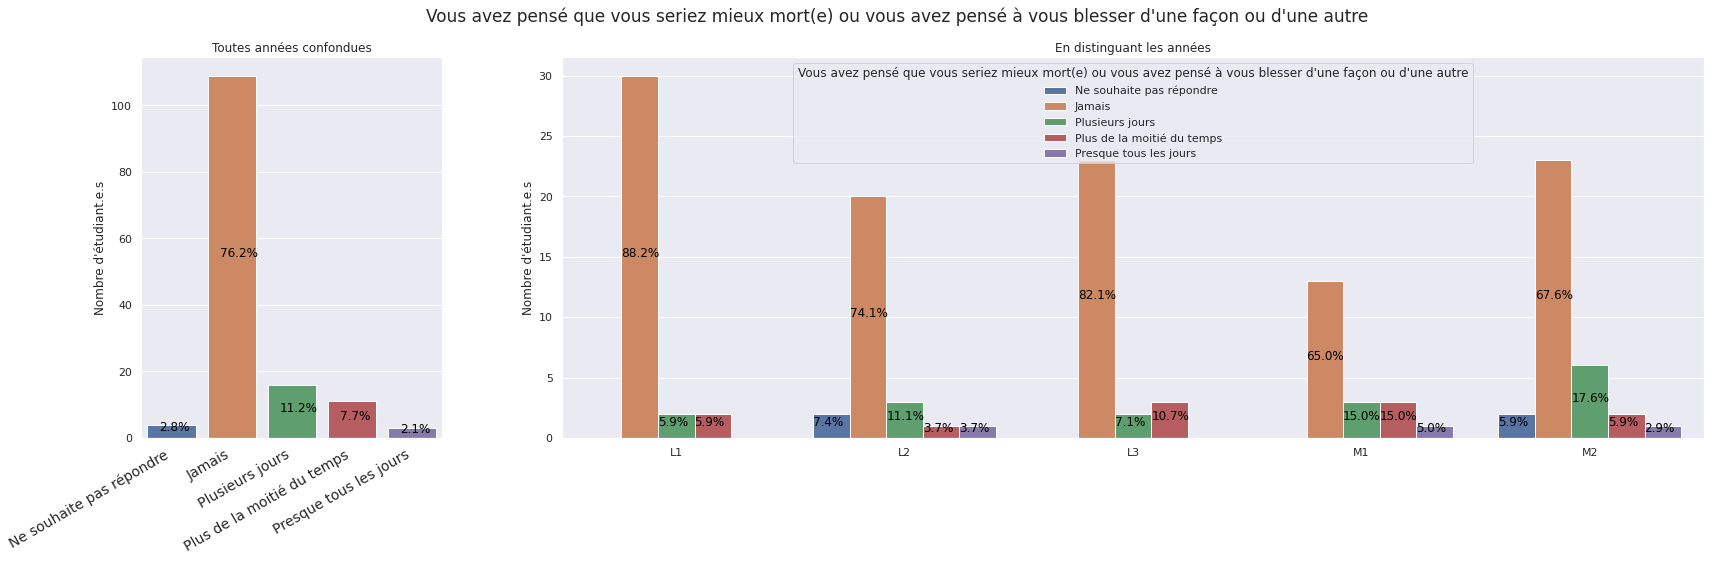

In [14]:
for i in qIpsosDepr :
    plot_both(i, "En quelle ann√©e √™tes-vous ?" )

#### Isolement

√Ä la question " _Vous sentez-vous isol√©(e) socialement ?_ ", nous avons eu les r√©sultats suivants.

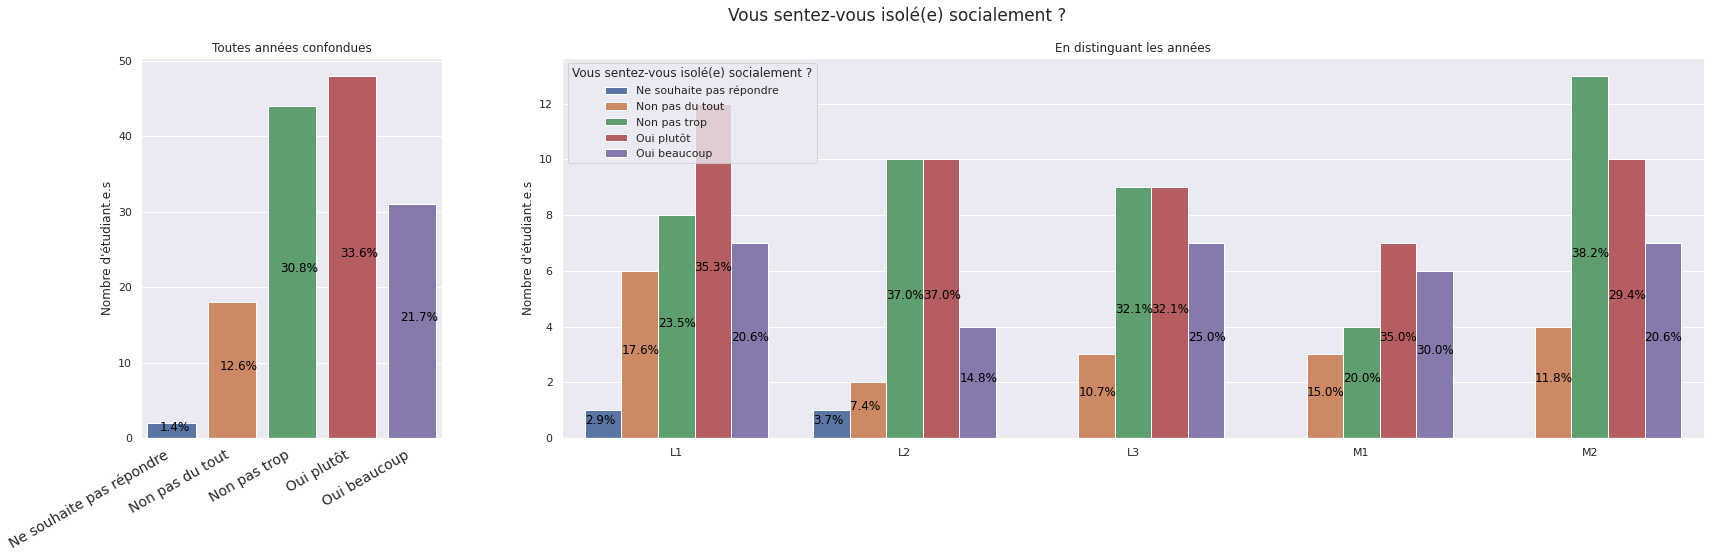

In [15]:
plot_both("Vous sentez-vous isol√©(e) socialement ?", "En quelle ann√©e √™tes-vous ?")

### Conditions d'enseignement

Nous avons demand√© aux √©tudiant.e.s d'attribuer une note de 1 √† 5 √† leur √©panouissement dans leurs √©tudes, 1 correspondant √† __Pas du tout__ et 5 √† __Tr√®s fortement__ 

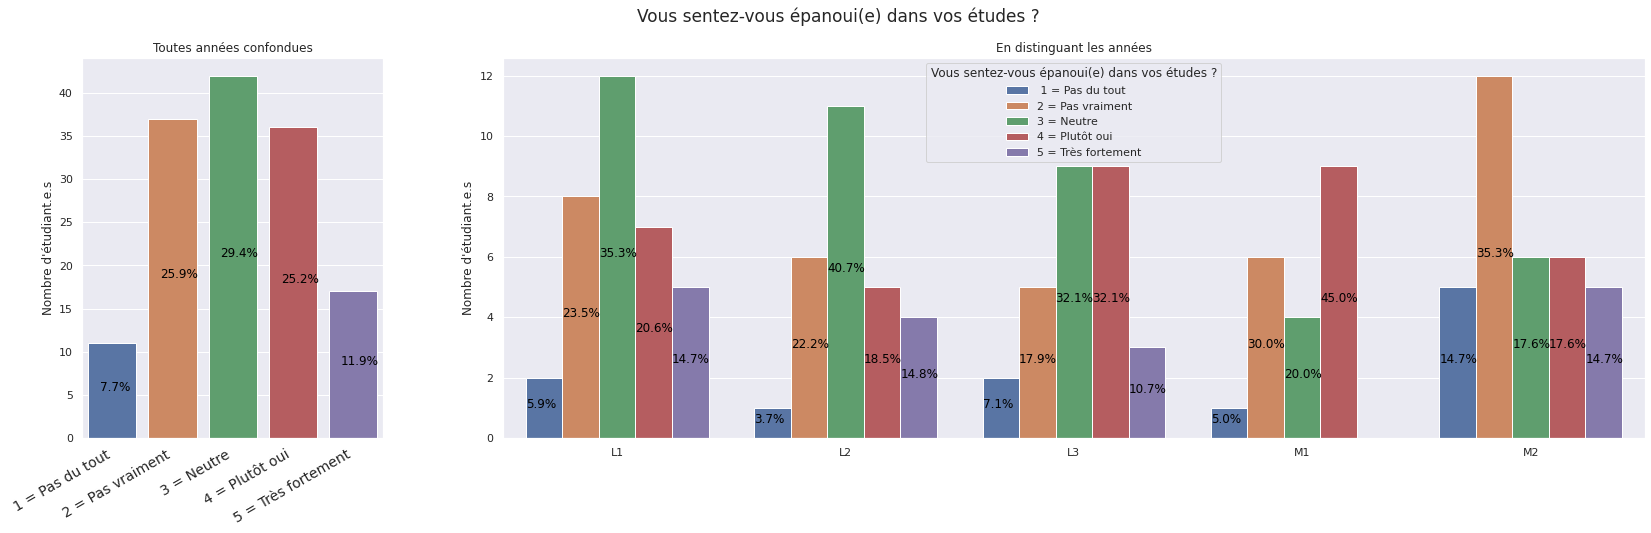

In [16]:
plot_both("Vous sentez-vous √©panoui(e) dans vos √©tudes ?","En quelle ann√©e √™tes-vous ?")


Nous leur avons demand√© s'ils ou elles avaient ressenti une baisse de motivation au cours des derniers mois, et si ils ou elles avaient eu envie d'arr√©ter leurs √©tudes.

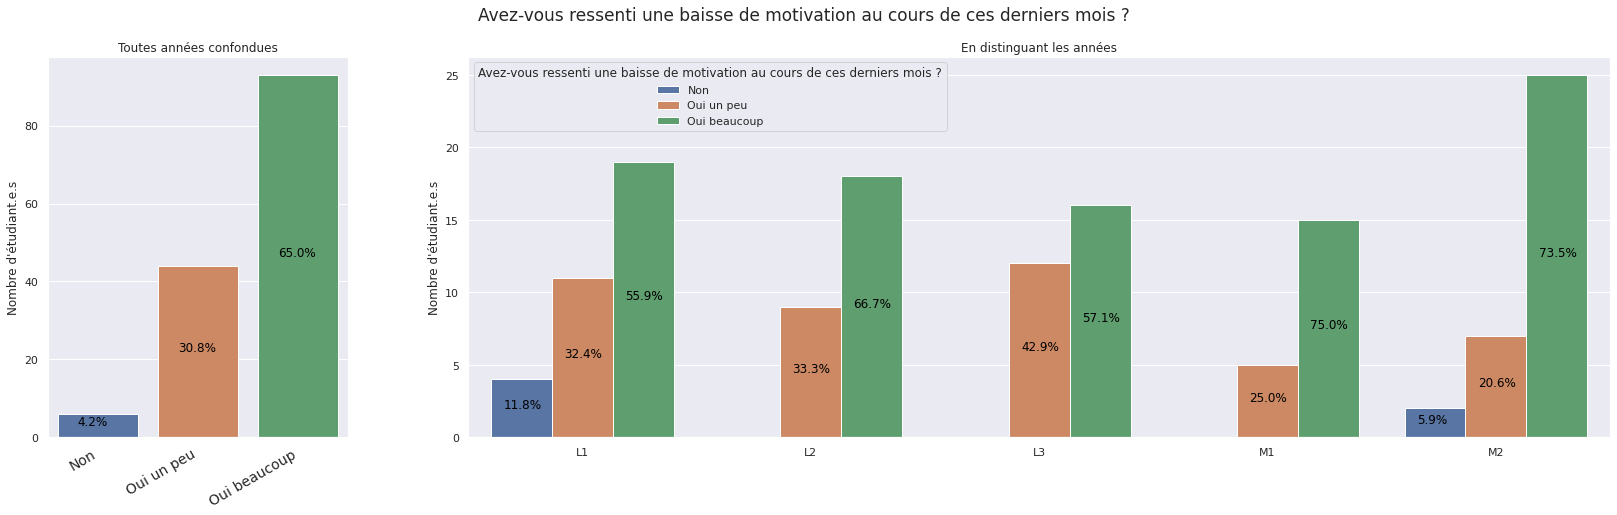

In [17]:
plot_both("Avez-vous ressenti une baisse de motivation au cours de ces derniers mois ?", "En quelle ann√©e √™tes-vous ?")

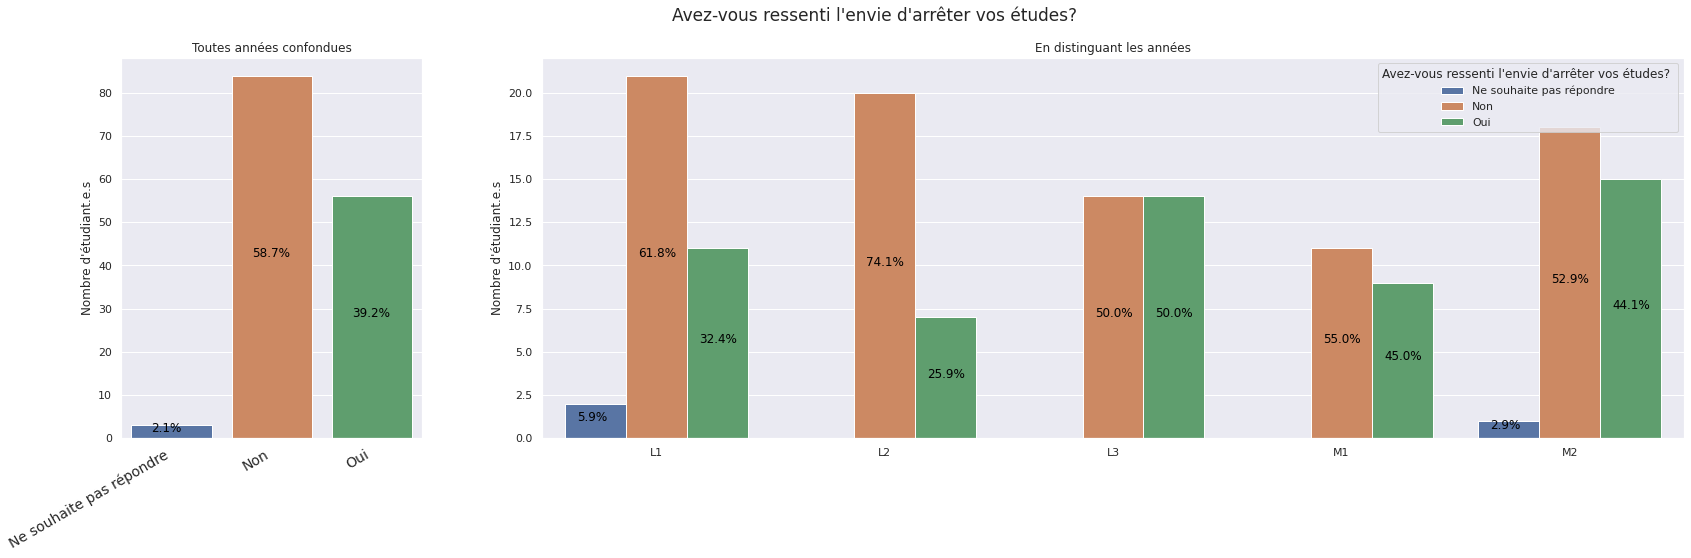

In [18]:
plot_both("Avez-vous ressenti l'envie d'arr√™ter vos √©tudes? ", "En quelle ann√©e √™tes-vous ?")


Il est √† noter que les √©tudiantes ont plus ressenti l'envie d'arr√™ter leurs √©tudes que la moyenne : 50% contre 33,3% chez les √©tudiants ou 33.3% chez les √©tudiant.e.s non binaire.

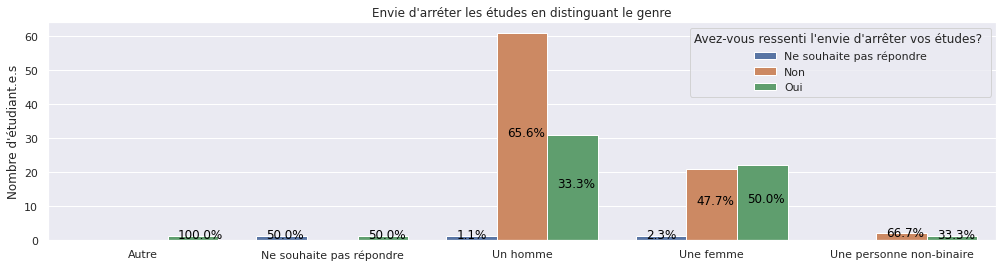

In [19]:
plt.figure(figsize=(17,4))
plot = sns.countplot(x="Vous √™tes ", hue="Avez-vous ressenti l'envie d'arr√™ter vos √©tudes? ", data=data)
perc_hue(plot, "Vous √™tes ", "Avez-vous ressenti l'envie d'arr√™ter vos √©tudes? ")
plot.set_xlabel("")
plot.set_ylabel("Nombre d'√©tudiant.e.s")
plot.set_title("Envie d'arr√©ter les √©tudes en distinguant le genre")
plt.show()

Nous avons √©galement voulu prendre le ressenti des √©tudiant.e.s sur les modalit√©s d'enseignements actuelles.

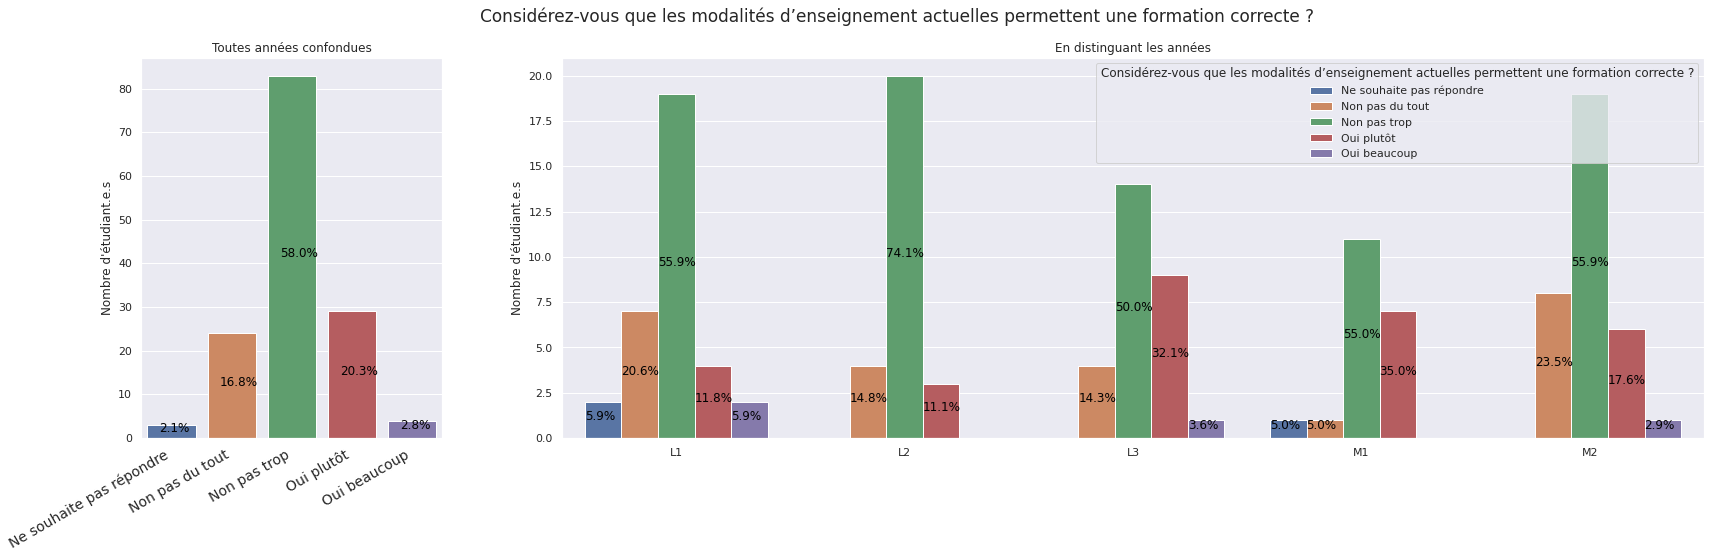

In [20]:
plot_both("Consid√©rez-vous que les modalit√©s d‚Äôenseignement actuelles permettent une formation correcte ?","En quelle ann√©e √™tes-vous ?")


A la demande de certain.e.s enseignant.e.s, nous avons demand√© l'avis des √©tudiant.e.s sur le retour au pr√©sentiel, et √† la possibilit√© pour eux et elles de se rendre en pr√©sentiel. Emmanuel Macron  avait en effet annonc√© _"Un √©tudiant doit avoir les m√™mes droits qu'un salari√© (...) S'il en a besoin, il doit pouvoir revenir √† l'universit√© un jour par semaine"_

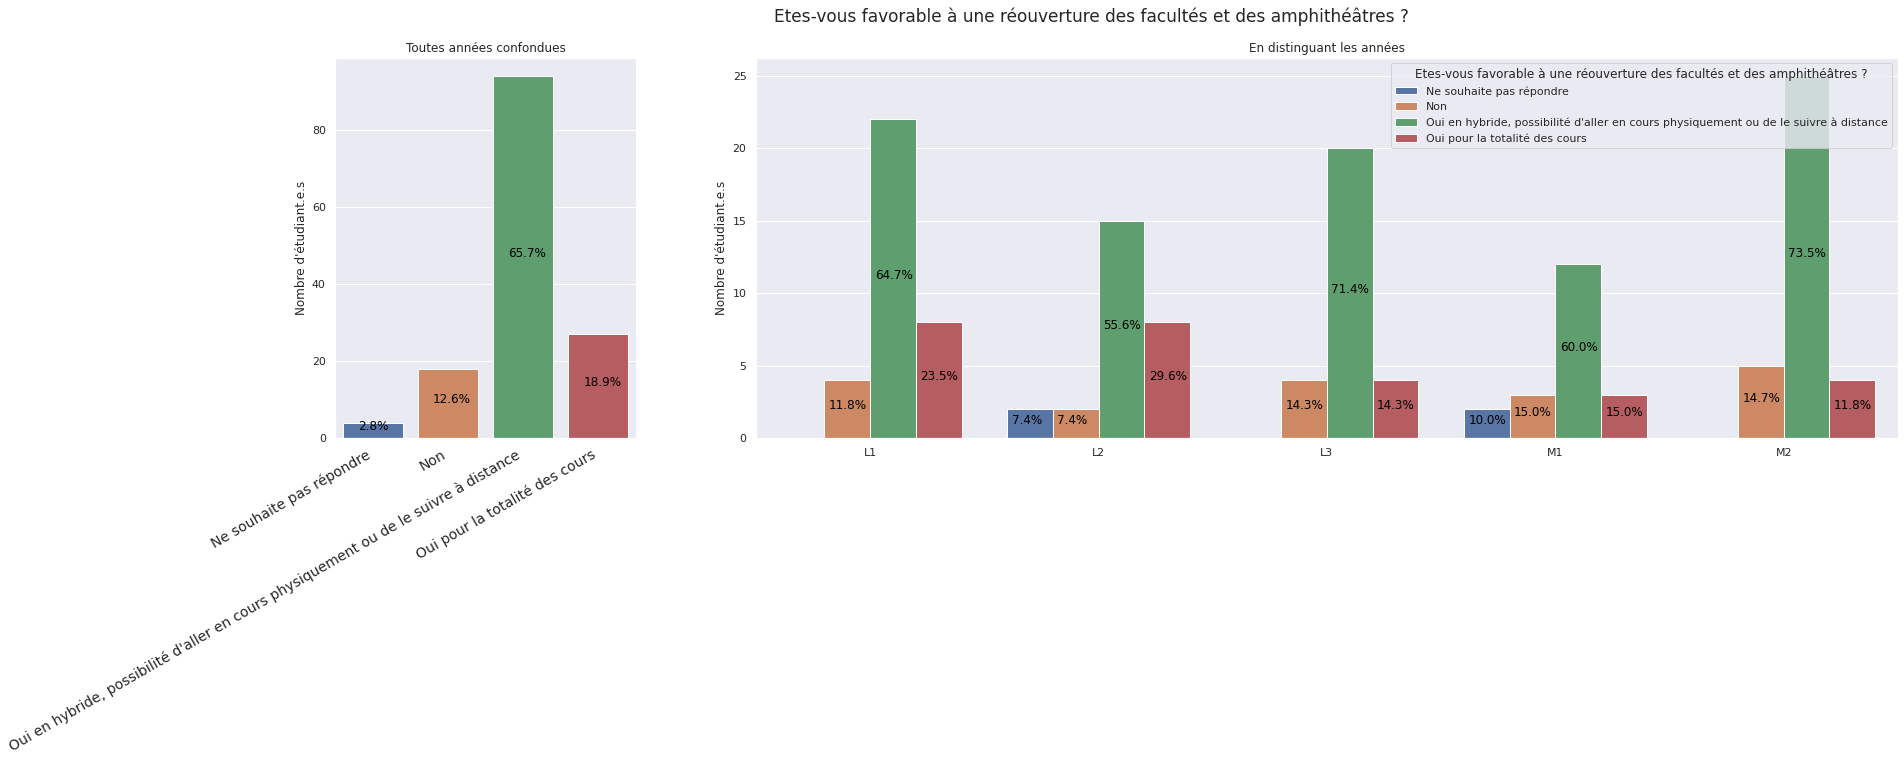

In [21]:
plot_both("Etes-vous favorable √† une r√©ouverture des facult√©s et des amphith√©√¢tres ?", "En quelle ann√©e √™tes-vous ?")


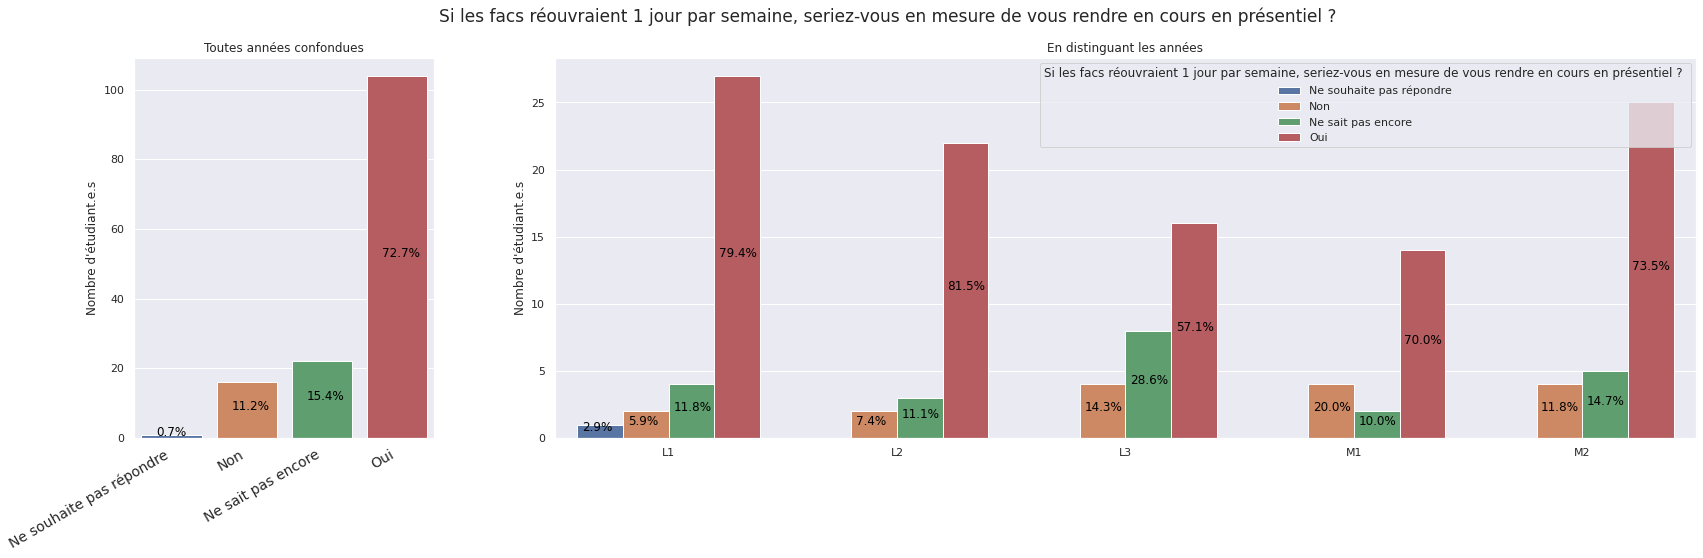

In [22]:
plot_both("Si les facs r√©ouvraient 1 jour par semaine, seriez-vous en mesure de vous rendre en cours en pr√©sentiel ? ", "En quelle ann√©e √™tes-vous ?")


### Pr√©carit√©

Nous avons aussi voulu nous renseigner sur la situation de chacun.e, la situation sanitaire ayant fragilis√© de nombreux et nombreuses √©tudiant.e.s.

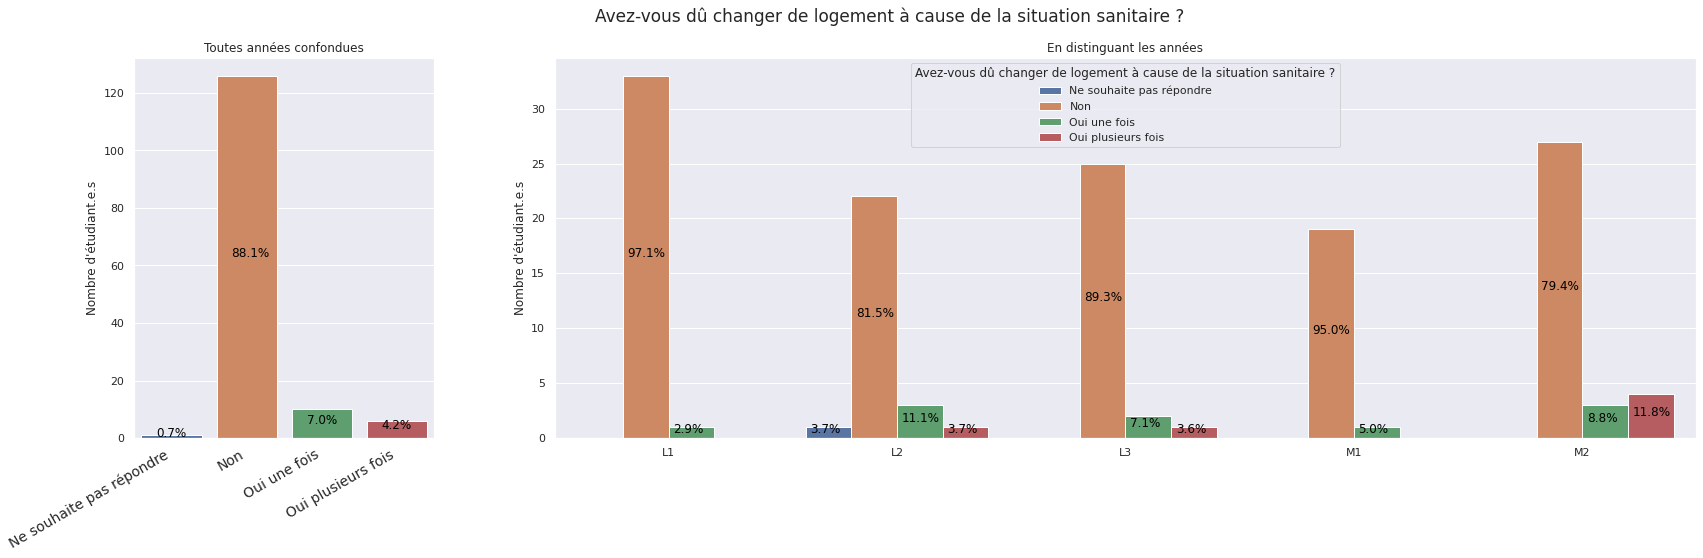

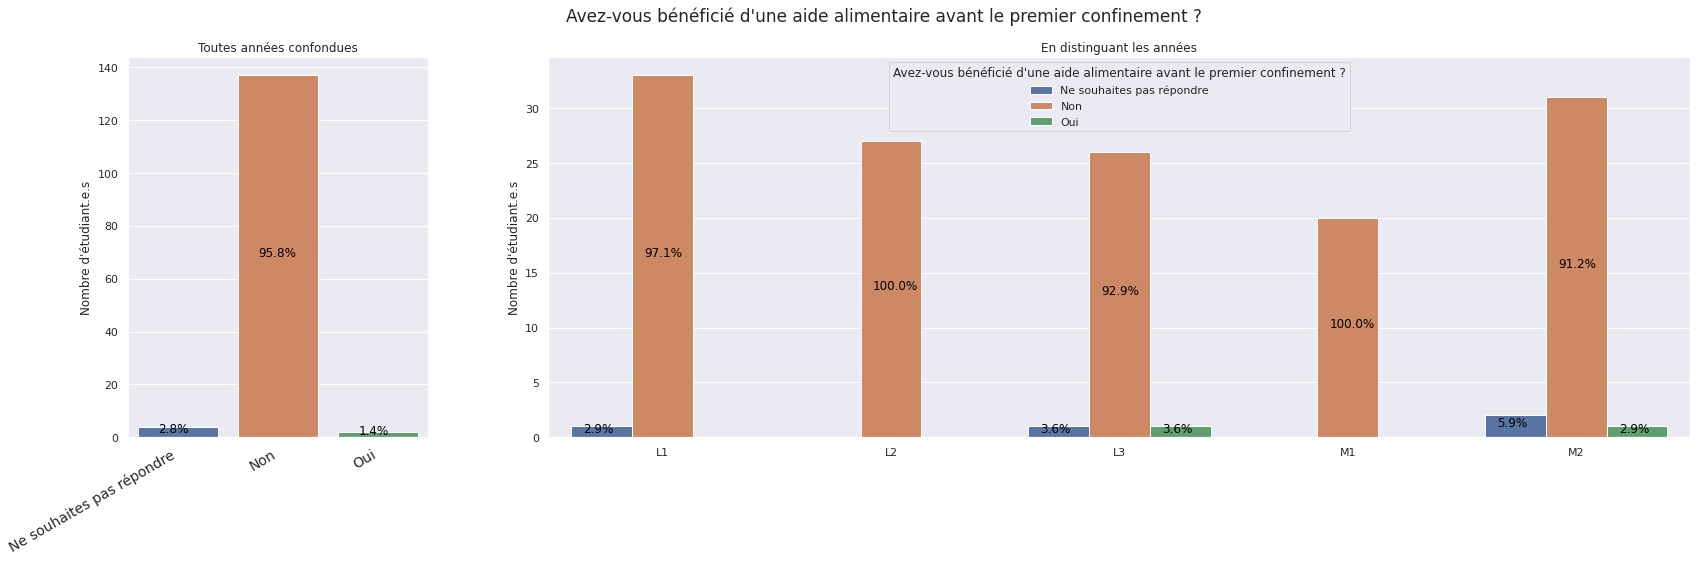

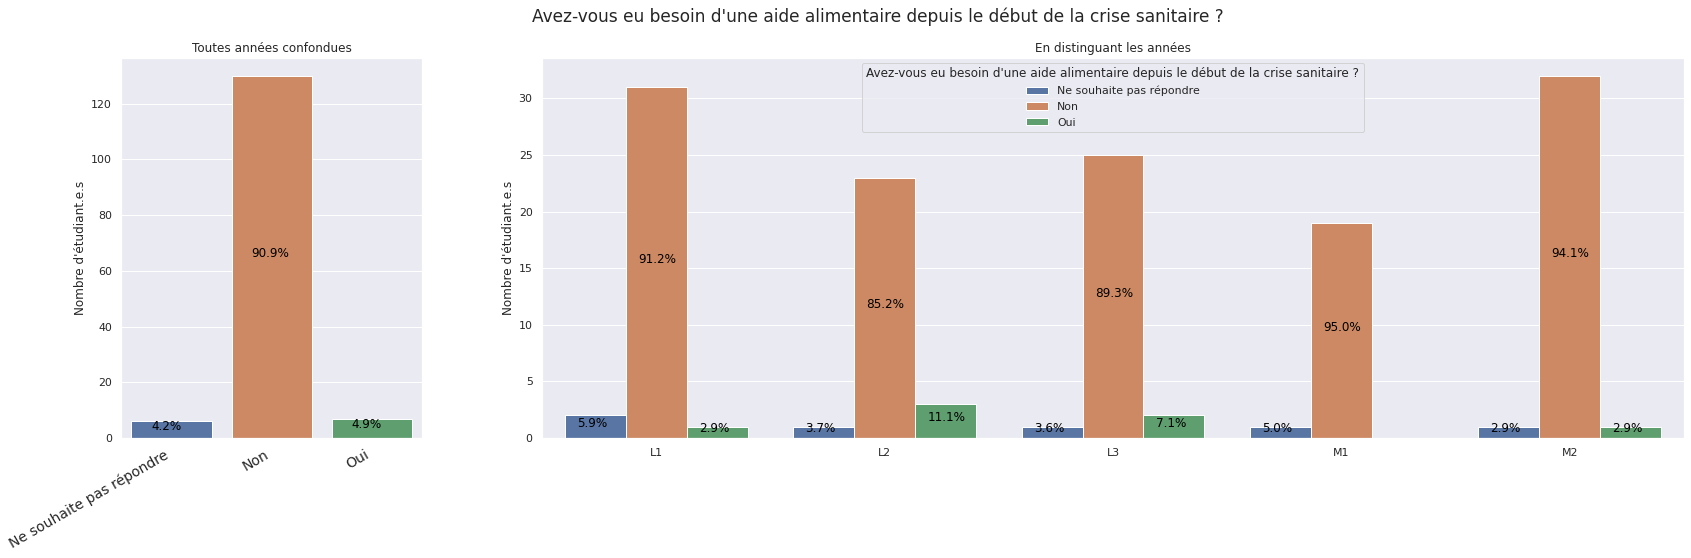

In [23]:
qPrecarite = ["Avez-vous d√ª changer de logement √† cause de la situation sanitaire ?",
       "Avez-vous b√©n√©fici√© d'une aide alimentaire avant le premier confinement ?",
       "Avez-vous eu besoin d'une aide alimentaire depuis le d√©but de la crise sanitaire ?"]

for i in qPrecarite : 
    plot_both(i, "En quelle ann√©e √™tes-vous ?")

Des commentaires textuels ont √©t√© laiss√©s concernant le logement, ils suivront dans la partie __Retours textuels__.

### Trouver de l'aide

Face aux nombreux retours t√©moignant du grand nombre d'√©tudiant.e.s souffrant de troubles anxieux, d√©pressifs et/ou √©tant peu √©panoui.e.s dans leurs √©tudes, nous avons trouv√© int√©ressant de demander si certain.e.s avait consult√©, et si chacun.e avait connaissance des ressources auxquelles s'adresser en cas de besoin.

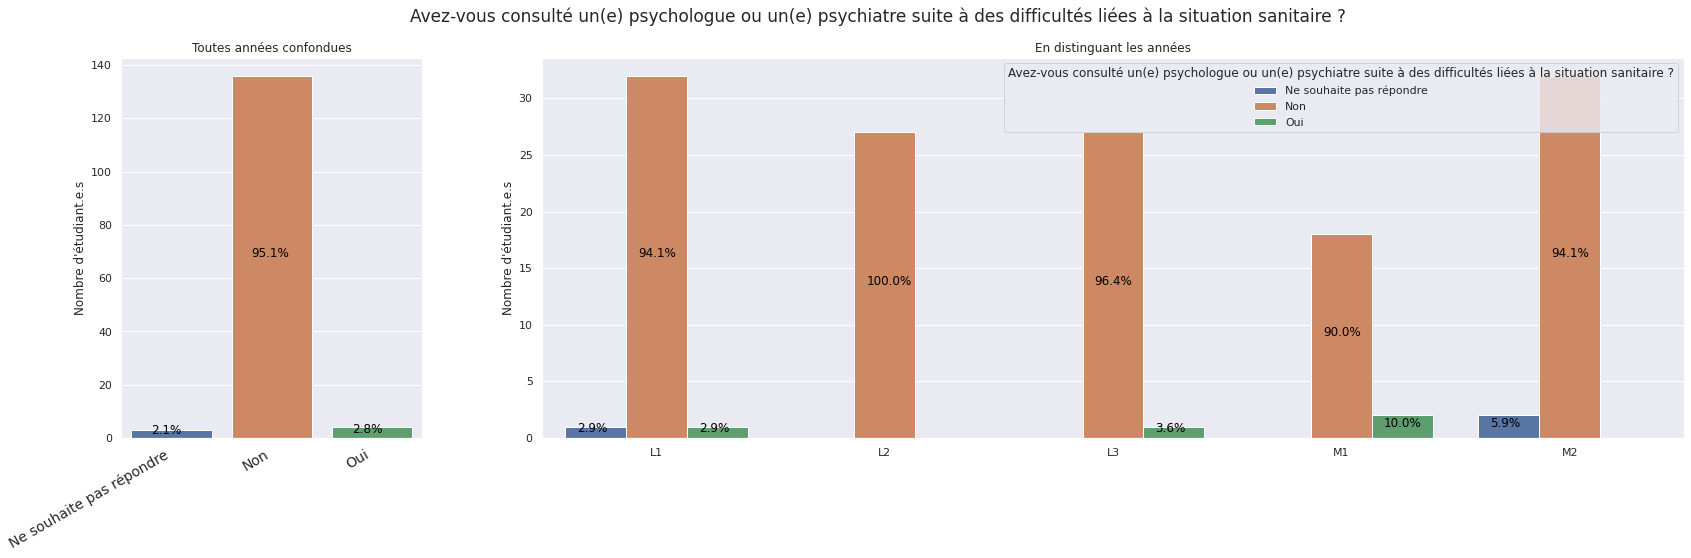

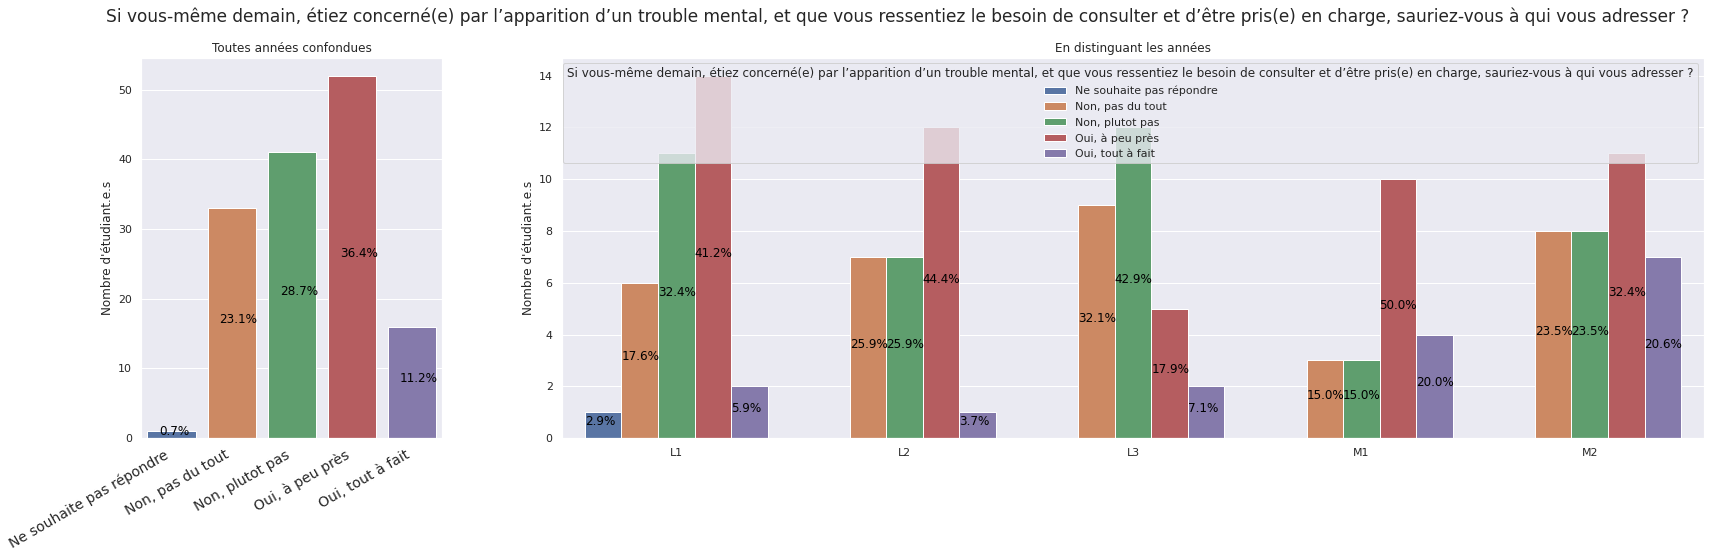

In [24]:
qAide = ["Avez-vous consult√© un(e) psychologue ou un(e) psychiatre suite √† des difficult√©s li√©es √† la situation sanitaire ?",
"Si vous-m√™me demain, √©tiez concern√©(e) par l‚Äôapparition d‚Äôun trouble mental, et que vous ressentiez le besoin de consulter et d‚Äô√™tre pris(e) en charge, sauriez-vous √† qui vous adresser ?"]

for i in qAide : 
    plot_both(i, "En quelle ann√©e √™tes-vous ?")

Il appara√Æt clairement que la majorit√© des √©tudiant.e.s ne savent pas forc√©ment √† qui s'adresser, ce qui a surement une incidence dans le faible nombre de consultations recueillies.

### Pour finir

Nous souhaitons finir les graphiques avec celui correspondant √† la question suivante : _Selon vous, le bien-√™tre des √©tudiant(e)s est-il mis de c√¥t√© ?_


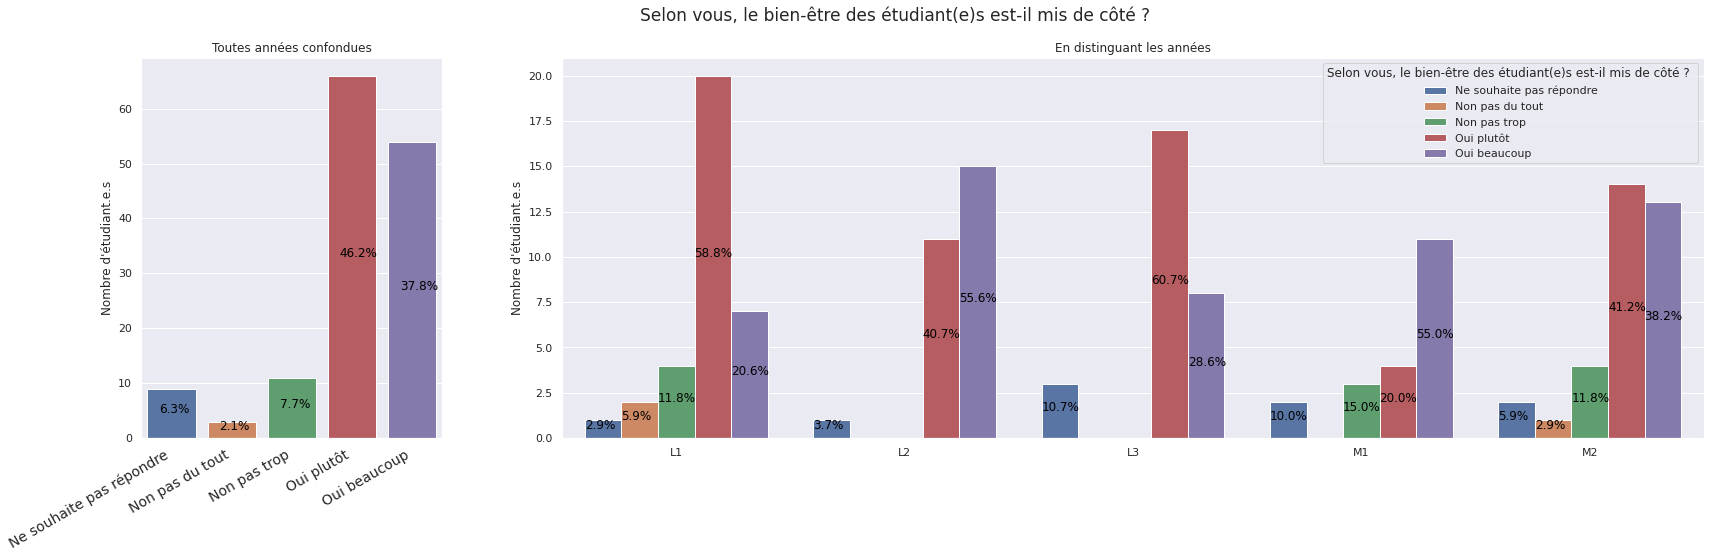

In [25]:
plot_both("Selon vous, le bien-√™tre des √©tudiant(e)s est-il mis de c√¥t√© ? ","En quelle ann√©e √™tes-vous ?")

## Retours textuels

Voici les commentaires laiss√©s par les √©tudiant.e.s, laiss√©s tel quel.

In [26]:
labels_text = ["Des remarques par rapport aux m√©thodes d'enseignement actuelles ?",
    "Des pistes pour l'am√©lioration des m√©thodes d'enseignement ?",
    "Vous pouvez nous √©crire un t√©moignage concernant votre logement ici",
    "Si vous souhaitez nous laisser un petit mot ou t√©moigner de votre situation pour que l'on puisse le remonter aux enseignant(e)s, c'est ici :"]

In [27]:
from termcolor import colored

pd.set_option('display.max_colwidth', None)
md = ''
for i in labels_text :
    md += '## <span style="color:red">{}</span>'.format(i)
    md += '\n * '
    md += '\n \n * '.join([str(x) for x in data[i].dropna().values ])
    md += '\n'
    md += '\n'
        
display(Markdown(md))

## <span style="color:red">Des remarques par rapport aux m√©thodes d'enseignement actuelles ?</span>
 * Les professeurs de TD/TP particuli√®rement ont fait beaucoup d'effort pour qu'on puisse suivre sereinement nos cours via discord. Pour les professeurs d'amphi ils restent malgr√© tout parfois un peu ferm√© √† nos requ√™tes
 
 * Les journ√©es sont parfois tr√®s longues, et nous n'avons pas de pause car les enseignants d√©passent de leurs horaires. Il est difficile de manger le midi, et quasi impossible de ne serait-ce qu'aller aux toilettes entre deux cours.
 
 * Absence de r√©els communication entre les professeurs et les √©l√®ves

 
 * Gros manque de communication, des profs qui nous donnent 0 nouvelle et une charge de travail toujours aussi importante 
 
 * Il faut garder les Tp/TD en presentiel, mais faut faire attention √† ce que l'on ai pas des cours √† distance et sur place dans la m√™me journ√©e. 
 
 * J'ai l'impression de recevoir trop d'informations √† traiter lors des amphis. Les cours vont  trop vites et on n'a pas le temps de comprendre ce qui est dit.
 
 * Je trouve qu'il est facile de se plaindre et que ce n'est pas facile, √©galement pour les professeurs. Cependant je peux reprocher ce sont les cours "questions/r√©ponses" qui ne sont pas souvent utiles.
De plus j'esp√®re que contrairement au semestre dernier, la quantit√© de travail au niveau des projets sera plus petit. Je travail 30/35h par semaine en plus des cours et c'est compliquer de jongler 5 projets en m√™me temps, m√™me pour mes camarades qui ne travaillent pas.

 
 * Merci √† l‚Äôenseignante qui n‚Äôaura jamais r√©pondu aux e-mails malgr√© plusieurs envoies a plusieurs adresses.
 
 * C'est assez al√©toire, √ßa d√©pend du profs et de leur volont√©s √† continuer de nous donner des enseignements de qualit√©. Mais essayer de vouloir continuer √† faire cours comme avant avec des cm/td en distanciel √ßa ne fonctionne pas. Les √©l√®ves perdus sont justes perdus. Apr√®s certains enseignants essayent bien de nous faire participer mais c'est aussi compliquer quand ils ont un mur en face.
 
 * Du stress est rajout√© aux √©tudiants en modifiant ill√©galement les MCC en plein milieu d'ann√©e. je pense surtout au M2 dont on a "interdit" l'acc√®s √† certaines mati√®res dont des fondamentales de parcours. En nous faisant passer pour des enfants en nous disant que les profs savent mieux ce qui est bon pour nous que nous. En continuant stupidement les cours comme si de rien n'√©tait en laissant la charge de travail la m√™me voire en l'augmentant. Ils se plaignent des difficult√©s qu'ils. ont avec la crise sanitaire mais ce ne sont pas les seuls. Nous aussi c'est difficile. Mais nous on sait que c'est difficile pour tout le monde. Eux non.
 
 * tout d√©pend des professeurs, pour le coup c'est un petit peu au petit bonheur la chance. Si vous tombez sur un professeur investi vous maitriserez facilement la mati√®re √† contrario un professeur qui d√©laisserait ses √©l√®ves et puis c'est l'incompr√©hension totale et puis petit √† petit le d√©gout de la mati√®re  
 
 * Certains profs ne mettent rien en place de special, on a limite l'impression qu'ils sont en vacances. Et certaines solutions ne sont vraiment pas adapt√©es comme les "questions/reponses". Apres certains profs ont quand meme fait beaucoup d'efforts comme des videos etc.
 
 * J'ai pris pas mal de temps √† √™tre au courant que les enseignements se poursuivait en ligne durant les semestres pass√© (beaucoup plus au 2nd semestre de L1 qu'au 1er semestre de L2) et √ßa a fait que j'ai fini avec une charge de travail beaucoup trop importante a quelque semaines avant les examens.
 
 * Je ne sais pas quel √™tre humain normalement constitu√© est capable de suivre un cours de 16h √† 19h, face √† un √©cran o√π d√©file un powerpoint sur un fond de voix monotone. Un an de distanciel et aucune adaptation de la part de la fac et des enseignants. Aucune interactivit√©, impossible de rester concentr√©.
 
 * Moins d‚Äôinteraction qu'en pr√©sentiel, peu "attractif" (simple lecture des slides, lecture du sujet de TD/TP puis plus de parole pendant le reste du cours). Cela d√©pend apr√®s du professeur √©videment. Mais le semestre dernier avec mes profs de TD/TP √©taient assez difficile √† suivre en distanciel
 
 * Distanciel
 
 * Je trouves que tout d√©pend de l'organisation du professeur : dans certaines mati√®res, le suivi continu, les cours sont corrects et les professeurs s'adapte assez bien aux outils de communications. En revanche, dans d'autres cours, certains professeurs ne font quasiment plus cours du tout, ils ne proposent pas de cours en visio, ni de vid√©o, ni m√™me de vrai poly de cours... 
 
 * Tous les professeurs ne sont pas coop√©ratifs vis-√†-vis de l'enregistrement des cours, certains trouvent cela inutile, m√™me pour les √©l√®ves ayant des difficult√©s √† suivre le cours au moment o√π celui-ci a lieu.
 
 * Y'a des profs biens qui font des cours interactifs et int√©ressants : ex avec des quizz, des tablettes pour √©crire comme au tableau... et c'est cool
Y'en a qui ne font que lire leurs slides et c'est affreux, encore plus quand leur connection est pourrie
 
 * Les √©tudiant(e)s sont isol√©(e)s et livr√©(e)s √† eux/elles-m√™mes tous les jours. Le sentiment de solitude est omnipr√©sent et il est difficile de se concentrer sur autre chose, surtout lorsque les cours sont en distanciel. 
Ces derniers sont pour la plupart assez mal g√©r√©s, √† la fois pour les professeur(e)s et les √©tudiant(e)s. Il est difficile de concilier un environnement calme de travail avec des appareils qui fonctionnent et de rester concentr√©(e) pendant les 2h compl√®tes, d‚Äôautant plus lorsqu‚Äôil y a des journ√©es avec plus de 8h de CM d‚Äôaffil√© en visioconf√©rence. De plus, il nous arrive fr√©quemment de d√©couvrir des devoirs √† rendre ou des examens sur moodle sans √™tres pr√©venu(e)s directement par les enseignants. 
Enfin, nous obtenons toutes les informations bien trop tard... Entre les changements d‚Äôemplois du temps et la dualit√© distanciel/pr√©sentiel, nous sommes pr√©venus au mieux, 2 jours avant le dit cours, au pire, la veille au soir.
Ce caract√®re impr√©visible est tr√®s mal v√©cu par l‚Äôensemble des √©tudiant(e)s.
 
 * tr√®s difficile de suivre les cours de math√©matiques √† distance, mais pour le reste c'est plut√¥t bien.
 
 * Tout ce que je sais, c'est que l'UFR d'info fait vraiment de son mieux, et ce n'est pas si mal contrairement √† d'autres UFR mais il ne faut pas nier que les √©tudiants ne sont pas dans les meilleurs conditions et nous avons des doutes sur si nous avons vraiment acquis les comp√©tences.
Honn√™tement je ne sais pas si on peut faire mieux logistiquement en distanciel...
 
 * Je sais que les cours √† la fac sont cens√©s √™tre moins encadr√©s, mais l√† on dirait presqu'on ne l'est pas du tout.
 
 * Le distanciel c'est bien pour ma part √ßa m'√©vite de perdre deux heures de travaille (en allant √† la fac et retournant chez moi), mais je trouve que les cours sont lent et qu'il manque de documentation, de pr√©paration, notamment pour les td par exemple le prof pourrait pr√©parer un pdf que l'on pourrai voir pendant le cours (ce qui est vraiment plus simple que d'√©crire sur un "whiteboard" durant le cours)
 
 * Les m√©thodes universitaires en g√©n√©ral sont d√©j√† plut√¥t m√©diocres je trouve (amphis inutiles car beaucoup d'informations √† assimiler mais avec une pratique en TP d√©cal√©e/insuffisante/pas assez encadr√©e/√† la va vite/tardive entra√Ænant oublis...) mais avec le distantiel c'est encore plus complexe pour tout le monde, les cours sont parfois condens√©s et donc le d√©bit d'information est encore plus √©lev√© et avec une pratique encore plus mauvaise car pas dans de bonnes conditions chez nous ou bien p√©dagogiquement parlant mauvaise (bien entendu c'est difficile pour tout le monde et ce dernier point ne vise personne √† part le virus bien s√ªr)
 
 * On sent un effort c√¥t√© enseignants, plus d'int√©r√™t pour nous, mais personnellement je ne pense pas qu'ils puissent y faire grand chose. Je pense qu'un retour en pr√©sentiel est trop important. Je prefere prendre le risque d'√™tre contamin√© que de rester la fin de ma licence enferm√©.
 
 * Certains prof ne font pas d'effort face a cette situation 
 
 * Peu d'intercation.
 
 * Je ne pense pas que mettre des matieres en notation 100% exam (protocoles r√©seau) soit souhaitable.
 
 * Probl√®me de stabilit√© au niveau des mesur√©s prises par le gouvernement
 
 * On a nos TD en presentiel et des amphis 30 minutes apr√®s la fin, j‚Äôai la chance d‚Äôhabiter Porte de Vitry mais presque personne n‚Äôest √† l‚Äôaise avec tout √ßa...
 
 * les cours en distanciel sont fastidieux. Ils sont lents et on apprend pas grand chose.
 
 * C‚Äôest plut√¥t chiant d‚Äôavoir une partie des cours en pr√©sentiel et l‚Äôautre en distantiel car venir √† la fac que pour deux heures ensuite se d√©p√™cher de rentrer chez soi pour suivre le cours en ligne c‚Äôest casse couilles.
 
 * Contraintes de choix d'enseignements incoh√©rent par rapport au domaine de formations. Modalit√©s de validation tyrannique au vu de la p√©riode du cycle d'√©tude ( p√©riode de recherche active de stage).
Incompr√©hension du discours des responsable de d'enseignement et forte inactivit√© de ceux-ci dans la direction et l'organisation de leurs parcours d'enseignement. 
 
 * J'ai du mal √† me concentrer, √† assimiler mes cours avec cette m√©thode surtout par rapport aux bugs des plateformes qu'on utilise mais aussi car  je trouve √ßa d√©motivant de suivre les cours de chez moi
 
 * Certains enseignants semblent appr√©cier aussi peu que nous les cours √† distances mais font des efforts ind√©niables.
 
 * Inadmissible 
 
 * Je pense que le probl√®me ne vient pas tant que √ßa de l'enseignement en lui-m√™me, parce qu'en soit on a toujours des profs qui nous font cours, √† qui on peut poser des questions etc... C'est juste le format qui n'est pas le m√™me et qui nous p√©nalise √©norm√©ment, parce que rester chez soi H24 devant son PC √† √©couter les profs pour ensuite quand c'est fini, rester encore devant son PC pour travailler ces cours / faire des TP / projets c'est tr√®s usant. Mentalement c'est √©prouvant, de ne pas pouvoir s'a√©rer, parler avec ses amis ou autres pour pouvoir ext√©rioriser. Sinon pour en revenir √† l'enseignement je pense que c'est propre √† chaque professeur et √† ses m√©thodes de travail. Personnellement, tous mes profs ont bien r√©ussi √† s'adapter et nous produisent des cours de qualit√©.
 
 * Faut tout changer !
 
 * Elles s'adaptent tant bien que mal, je pense que le probl√®me est surtout dans l'adaptation c√¥t√© √©tudiant.
 
 * Au dela de 2h de cours, c'est juste pas possible de rester concentr√©
 
 * On a deux fois plus de travail (lire le chapitre + vid√©o 2h, cours q/r 2h, travail personnel)
 
 * Surcharge de projets et travails surement du au fait que les profs pensent que nous ne faisont rien chez nous. Mais moi je vis seul en appartement j'ai toutes les t√¢ches m√©nag√®res √† faire encore plus qu'au quotidien normal de quand je vais a l'universit√©. 
 
 * Motivation quasi-inexistante lors des cours en distanciel, contrairement aux rares cours en pr√©sentiel qui remotivent grandement.

## <span style="color:red">Des pistes pour l'am√©lioration des m√©thodes d'enseignement ?</span>
 * Les profs devraient faire plus de sondage pour nous demander du feedback sur leur cours 
 
 * La reprise des cours en pr√©sentiel, pour ceux qui le souhaitent.
 
 * Avoir un lieu o√π l'on peut se faire aider sur ses DM/projets perso (Channel discord ou autre) et aussi avoir les profs dans ce Channel pour qu'il puisse se rendre compte si leur cours son compris ou non. 
 
 * Des cours plus structur√© et des petites pauses d'une ou deux minutes entre chaque partie importante pour facilite la compr√©hension
 
 * Pas vraiment, nous sommes tous prit et contraints par la situation.
Le mieux a faire est d'apporter du soutien √† celles et ceux qui en ont besoins!
 
 * OUI : Imposer un d√©lai pour rendre les copies/notes/r√©ponses aux mails
 
 * Eviter de laisser partir tous les bons enseignants et de nous donner des enseignants qui ne veulent pas faire cours.
 
 * Commencer par apprendre √† enseigner. A savoir que l'enseignement ce n'est pas que le bon d√©roulement d'un cours mais aussi √™tre √† l'√©coute des √©tudiants.
 
 * Une meilleure communication et une meilleure maitrise des outils (Discord/Zoom), des cours avec plus de sch√©mas et pas simplement des slides √† s'endormir au bout de 10 minutes, de l'interaction avec les √©l√®ves pour certains cours.
 
 * Avoir des profs plus presents qui nous explique vraiment les choses plutot que de juste repondre a 2/3 questions de temps en temps. Et des corrections pour au moins comprendre ce qui nous etait demand√©.
 
 * De bons progr√®s ont d√©j√† √©t√© fait. J'aimerais que la communication entre √©l√®ves soit beaucoup plus facilit√©. Beaucoup d'√©l√®ves (comme moi avant que je rejoigne les serveurs discord) sont surement dans leur coin et n'ont pas un cercle de contact au sein de l'universit√© et les laisser comme √ßa peut grandement jouer au niveau de leur motivation. Mettre en avant les serveurs discord des fili√®res serait une bonne id√©e.
 
 * Nous obliger √† mettre les cameras et les micro (je pense que c'est vraiment indispensable).
Mettre en place des solutions interactives comme des quiz (pas des quiz sur word √† rendre √† la fin, des questions au fur √† mesure du cours, on pourrait cliquer directement sur l'ecran, il y a des plugins pour √ßa, comme sur twitch) qui nous pousseraient √† suivre.
Eviter de nous balancer des slides et les lire pendant 15min. On sait lire.
 
 * Que l'ensemble de informations soient transmises √† l'ensemble des √©tudiants concern√©s via les vois officielles et non de mani√®re informelle √† un sous-ensemble des-dits √©tudiants.

Que les liens vers les conf√©rences en lignes soient toujours disponibles sur Moodle et non que l'on aie √† les chercher dans des recoins obscurs de l'Internet (C'est d√©j√† le cas pour la majorit√© des cours, mais il y a des instances o√π ce n'est toujours pas le cas)
 
 * Cours plus interactif : sondage sur zoom, activit√© sur kahoot (en CM de AAL [L2], on avait droit √† des qcm de fin de s√©ance pour revoir les points abord√©s, avec des explications sur les erreurs fr√©quentes)

Cours plus attractives : des sch√©mas sur diapositive, petits exercices (comme kahoot d√©j√† cit√©) entre deux notions pour am√©liorer la participation (m√™me TD/TP). Les exercices de TP en m√™me temps que le prof : on lit les √©nonc√©s, les √©l√®ves proposent leur id√©e, puis on explique les fautes.

Mettre les diapositives avant le CM : cela pourrait permettre aux √©l√®ves s'approprier le cours avant le CM, puis de poser des questions (c'est un format que l'on adopt√© dans certains cours de Japonais), puis comme propos√© plus haut, avoir des mini-exercice, on peut aussi l'appliquer pour les TD. De plus, avec les soucis de connexion, venant d'√©l√®ves comme de professeur, avoir le cours d√©j√† en t√™te plut√¥t que de le d√©couvrir avec la moiti√© des mots aval√©e par la mauvaise connexion serait un peu plus b√©n√©fique.


 
 * Presentiel
 
 * Permettre aux √©l√®ves de conna√Ætre leur notes pour situer leur niveau dans les mati√®res (et ne pas avoir √† attendre 3/4 mois pour recevoir les r√©sultats d'un partiel...) 
Publier les slides des cours si il y en a (ou mieux :  des vid√©os, des rediffusions de cours en lignes) 
Pour les TP : donner les corrections (si possible, pas seulement oralement, car un peu compliqu√© quand c'est du code par exemple) 
 
 * Le microoooo !! Faut que la fac ach√®te des micros √† ses enseignants svp svp !! C‚Äôest √©nervant et j‚Äôarrive pas √† suivre correctement it disturbs me 
 
 * Adapter la difficult√© et le nombre de projets, DM et contr√¥les, et mieux les r√©partir sur l'ann√©e afin de ne pas nous surcharger de travail au moment des exams.
 
 * Pas assez d'enseignants enregistrent et mettent √† disposition les cours pour que chacun puisse quand il le peut suivre. 
 
 * Faire des pauses (pas 2 heures en distanciel sans pause); faire des quizzs au milieu, faire gaffe √† avoir une bonne connection si possible, bien communiquer par mail ou discord pour que les √©tudiants sachent ce qu'il se passe.
 
 * - Privil√©gier les cours en direct ou des cr√©neaux dits de ¬´¬†FAQ¬†¬ª (sur discord par exemple) afin de favoriser l‚Äô√©change direct entre les enseignant(e)s et les √©tudiant(e)s qui sont jusque maintenant, oblig√©(e)s d‚Äô√©changer mails sur mails. 
- √âventuellement, augmenter les travaux de groupe ou les discussions entre √©tudiant(e),s afin d‚Äô√©viter l‚Äôisolement et les √©ventuels d√©crochages scolaires
- Pr√©venir directement sur bo√Æte mail √©tudiante l‚Äôajout de devoirs ou d‚Äôexamens
- Instaurer des pauses entre les visioconf√©rences (les 15 minutes d√©j√† accord√©es correspondent en r√©alit√© √† 5 min car les enseignant(e)s d√©bordent souvent sur leurs horaires)
- Obtenir les informations relatives aux changements d‚Äôemploi du temps, en temps et en heure (m√™me lorsque les informations peuvent changer du tout au tout) car certain(e)s d‚Äôentre nous doivent pr√©voir le d√©placement jusqu‚Äôen r√©gion parisienne. 
 
 * pour certains, mettre les pdfs ou les slides du cours serait vraiment un plus, on a parfois pas le choix de louper un cours, et c'est assez difficile de rattraper.
 
 * Je n'ai pas d'id√©e, j'ai juste l'impression que nbous devons faire plus avec les vid√©os pour s'en sortir.
 
 * La reprise du pr√©sentiel dans la mesure du possible, et plus de dispositifs pour "motiver" √† travailler comme des exercices en ligne (pas forc√©ment not√© et sur la base du volontariat).

 
 * Voir ci-dessus
 
 * C'est compliqu√© malheureusement, personnellement chez moi c'est tr√®s difficile d'√™tre vraiment concentr√© je pr√©f√©rerai du pr√©sentiel pour √™tre concentr√© parfaitement sur le travail mais bien s√ªr c'est probablement impossible. Au mieux il faudrait au moins am√©liorer l'encadrement en TD/TP je pense.
 
 * Nous avons eu un cours d'un professeur qui √©tait √† la fac (il pensait en fait que le cours √©tait en pr√©sentiel). 
Ca m'a donn√© l'id√©e qu'on pourrait faire un syst√®me comme "les personnes volontaires vont √† la fac pour les cours (avec une attestation sp√©ciale (comme dans les lyc√©es en fait simplement) qui dit de quelle heure √† quelle heure on peut y aller ?
Si il faut plus, on peut faire un syst√®me d'inscriptions aux cours avec une limite pr√©sentielle. 
Exemple : Pour les cours de la semaine on s'inscrit, le week-end, √† 4 cours max ou simplement √† une journ√©e par semaine. Premier arriv√© premier servi. Ca permettrait de limiter les inscriptions et donc savoir combien de personnes sont au cours (et qui au passage). On limite ainsi les clusters et on permet un minimum de social/bon enseignement. Ca permet aussi de choisir les cours o√π on est en difficult√© par exemple.
Je pense que ce syst√®me est largement faisable. Il faut juste de l'organisation.
(apr√®s je ne dit pas non √† une ouverture totale de la fac)
 
 * Faire des cours plus interactif avec par exemples des sondages, questions destin√© √† une seule personne en TD (sans pression en cas de non r√©ponse bien s√ªr)
 
 * Il est n√©cessaire que certains professeurs fassent un plus grand effort de communication et d'interaction avec les eleves, surtout pendant les td et tp, afin de soliciter les √©l√®ves a participer et donc mieux suivre
 
 * les vid√©os capsules sont mieux que les vid√©os en direct. On peut apprendre √† notre rythme (plus vite ou moins vite).
 
 * Retravailler sur l‚Äôemploi du temps des l1.
 
 * Avoir des r√©f√©rents d'enseignement sp√©cifique √† leurs fonctions de r√©f√©rents, qui n'ont pas une cinquantaine de r√¥le au sein de leur UFR. De sorte qu'ils ne puissent pas se terrer d√©rri√®res des activit√©s tierces pour s'excuser de leur manque d'implication sur d'autres.
Par rapport aux m√©thodes d'enseignements en tant que telles, la surcharge hebdomadaire de travail suite √† l'apparition miraculeuse du Contr√¥le Continue (uniquement d√ª au contexte sanitaire) est totalement mal g√©r√©e et efface de mani√®re unilat√©rale le temps temps d'acc√®s √† toutes activit√©s extra-scolaire ou autre.
 
 * Garder un minimum de cours en pr√©sentiel, favoriser le travail en √©quipe pour garder un lien social avec les autres.
 
 * Le retour en pr√©sentiel !
 
 * Plus, voir que des vid√©os 
 
 * Pourquoi pas, lorsque c'est possible, d√©dier chaque jour √† une mati√®re ? De mani√®re √† aider l'organisation des √©tudiants‚Ä¶
 
 * Des pauses r√©elles de 15 min et pas 5 et demi √† la vol√©e, poser des questions aux etudiants, nous envoyer des mails √† tous et pas √† des sous ensembles d'etudiants qui ne transmettent pas forc√©ment les informations. Nous donner nos notes en temps et en heure, on est d√©j√† suffisamment angoiss√©.es comme ca pour en plus rester des mois sans nouvelles de nos r√©sultats. 
Proposer des rendez vous en petits groupes en pr√©sentiels √©ventuellement.
 Je sais qu'une grande partie des enseignants font de leur mieux, mais j'aimerai beaucoup plus de transparence de leur part, et des deadlines claires et pr√©cises. Et pour certains profs qui ne savent toujours pas utiliser zoom ou BBB, ca fait maintenant un an qu'on en est r√©duit √† ca, c'est incroyable de ne toujours pas savoir utiliser ces outils quand vous avez des coll√®gues dans le bureau d'√† c√¥t√© qui savent le faire. Faites vous des petits groupes de cours si vous n'√™tes pas √† l'aise, parce que derri√®re on est entre 20 et 80 √† en patir ... 
A ceux qui organisent des examens en pr√©sentiel et nous rabrouent le jour J parce que c'est d√©j√† "intol√©rable d'organiser ca en p√©sentiel", ce n'est pas notre choix √† nous, √ßa ne sert √† rien de projeter vos angoisses sur nous. A ceux qui organisent des QCM en examens en pr√©sentiel, vraiment est ce la peine de nous faire venir pour ca ? Il faut adapter les modalit√©s d'examen et les √©chelles temporelles pour les stages parce qu'on ne s'y retrouve vraiment pas . 
 
 * Faire participer tout le monde en posant des questions sur le cours par ex, des petits quizz.
 
 * √ätre plus raisonnable et traiter au cas par cas 
 
 * Plus de compr√©hension des profs face aux difficult√©s du distanciel. 

## <span style="color:red">Vous pouvez nous √©crire un t√©moignage concernant votre logement ici</span>
 * Mes voisins du dessous regardent la t√©l√© fort √† une heure du matin : un bonheur.
 
 * Impossible de se confiner dans 15m2
 
 * J‚Äôhabite actuellement chez mes parents, je ne suis pas vraiment √† plaindre contrairement √† certains √©tudiants qui eux vivent seules
 
 * J'ai la chance d'habiter pr√®s de la Gare et de ne pas avoir un trajet trop long en train. Mais si il est plus agr√©able pour certaines personnes d'avoir cours √† distance √ßa ne me d√©range pas. 
 
 * Le seul espace de travail disponible chez moi et dans le couloir en face de la porte d'entr√©e de mon appartement, le seul lieux ou je peux √™tre isol√© pour √©couter des cours et dans mon lit ce qui n'est pas adapt√© pour se concentrer. Le bruit de ma famille me g√®ne souvent et je ne peux pas leur demander d'arr√™ter de vivre leur vie pour que je puisse √©couter mes cours parce que nous avons tous les m√™me probl√®mes.
 
 * Je vis seul dans mon appartement, je ne me plains pas car je vis bien la solitude. De plus mon appartement n'est pas trop petit et j'ai un balcon.
 
 * je vais tous les jours a la biblioth√©que pour suivre mes cours car la ou j'habite je n'ai pas un espace de travail de plus le biblioth√®ques s ouvrent a 9h30 et ca m'arrive de commencer les cours a 8h30 donc je rate des  et encore je prend le risque de rentrer a 18h de payer une amande de 130e
 
 * c'est un 20 m√®tres carr√©, un bordel sans nom t je peux m√™me pas y √©chapper. je suis bloqu√©e chez moi pour travailler.
 
 * Colocation dans un appart assez petit mais avec chacune notre chambre, tres peu lumineux donc ca n'aide pas pour le moral...
 
 * √áa va, je fais partis des privil√©gi√©s.
 
 * Il y a bien souvent de gros travaux juste devant, ainsi que des f√™tards qui malgr√© confinement et couvre-feu restent devant jusqu'√† tr√®s tard ce qui m'emp√™che de dormir. 
 
 * Concernant certain(e)s de mes camarades, des d√©m√©nagements pour pr√©venir les risques de contagion √©ventuelle ont √©t√© forc√©s impliquant alors leur isolement (et leur impuissance) face au contexte actuel. 
 
 * Un studio avec de la famille derri√®re.
 
 * J'ai d√ª rentrer a l'√©tranger chez ma famille car je n'ai pas pu trouver un job √† cause de covid et je n'avais plus d'argent pour ma vie quotidienne en France
 
 * Logement familial aucun probl√®me de ce c√¥t√© personnellement 
 
 * Je suis dans un petit appartement et je suis tr√®s souvent enferm√© dans ma chambre qui est du c√¥t√© le moins lumineux de l'immeuble et c'est assez souvent peu agr√©able. Je profite de sortir un maximum, mais ce n'est pas toujours √©vident et la motivation n'y est pas non plus.
 
 * Dispute familiale fr√©quente durant les cours, rendant parfois impossible la participation oral
 
 * Je n‚Äôai pas voulu changer de logement, j‚Äôai eu suffisamment de mal cet √©t√© pour en trouver un
 
 * je vis avec mes parents.
 
 * grand appartement √† Paris ou l'on vit √† 6
 
 * Mon logement est familial, et je n'ai pas de quoi bien √©tudier (calme, bureau‚Ä¶).
 
 * Je vis comme beaucoup je pense dans un petit appartement tr√®s peu lumineux. Tr√®s chouette pour y passer mes soir√©es et mes weekends, moins chouette pour y vivre plusieurs mois coup√©s du monde. Pour preuve j'ai voulu prendre des plantes, seule une foug√®re √† surv√©cue, et elle est en piteux √©tat tellement il fait sombre. J'ai du rentrer chez mes parents tr√®s loin de Paris pour ma sant√© mentale, et rentrer √† Paris en catastrophe pour des examens dont on a eu le planning quelques jours avant pas merci pour le prix des billets. Avec le retour suppos√© du pr√©sentiel je ne peux m√™me pas d√©cider de retourner de nouveau chez mes parents, parce que je n'aurai pas les moyens de payer des billets aller retours ind√©finiment. Dans tous les cas l'ambiance de travail n'est pas du tout id√©ale, et pour des raisons √©vident de sant√© j'√©vite de prendre les transports et donc de me rendre √† la biblioth√®que.
 
 * Je suis dans une r√©sidence √©tudiante. Le soucis est que ma connexion internet n‚Äô√©tait pas totalement en marche j‚Äôai donc du retourne chez mes parents pour avoir une connexion stable. C‚Äô√©tait tr√®s dure de se concentrer tout le temps
 
 * tr√®s difficile de travailler √† la maison dans le bruit, le meilleur pour travailler est quand ils dorment tous, c'est-√†-dire apr√®s 0h...
 
 * J'ai un probl√®me de logement en parall√®le de la crise du covid qui exacerbe le sentiment de solitude et d'enfermement que j'ai.

## <span style="color:red">Si vous souhaitez nous laisser un petit mot ou t√©moigner de votre situation pour que l'on puisse le remonter aux enseignant(e)s, c'est ici :</span>
 * Merci les cop.ine.ain.s : tr√®s bon formulaire ! Du courage et des bisous ! 
 
 * Les enseignant.e.s ont fait des efforts qui rendent les cours plus simple √† suivre pour la plupart.
Par contre les responsables de master ou de p√©dagogie nous laissent dans un flou total. Ils nous ont demand√© de nous inscrire sans nous mettre un d√©lais particulier pour au bout de moins d'une semaine fermer les inscriptions sans pr√©venir, avant m√™me qu'on puisse assister au cours pour se faire une id√©e.
Pendant les examens et les soutenances les enseignants se sont permis des familiarit√©s et des injures √† propos des √©tudiants, troublant le calme n√©cessaire pour faire un examen sans vraiment respecter les r√®gles sanitaires (on se passait les copies entre √©tudiants, toucher nos cartes √©tudiantes, laisser les fen√™tres ferm√©es pour les soutenances, etc...) 
 
 * J'habite dans un deux pi√®ces avec mon copain et ma fille de 6 mois. Je n'ai pas trouv√© de mode de garde pour mon b√©b√© jusqu'√† tr√®s r√©cemment, je n'ai eu aucun soutien de la fac, et il est difficile de suivre les cours toute la journ√©e en distanciel en s'occupant en m√™me temps d'un b√©b√©.
Je viens d'√™tre diagnostiqu√©e avec une d√©pression et un trouble anxieux. La situation est difficile et les enseignants se montrent parfois peu compr√©hensifs.
 
 * Pas vraiment
Par rapport √† la maquette de la licence cependant, √ßa serait bien d'avoir un projet INTER-UE obligatoires, par exemple pour ce semestre on aurait pu avoir un site √† faire, utilisant une BDD, et proposant un service d'analyse grammaticale ? √áa serait toujours plus concret qu'avoir des projets √† droite √† gauche :/
Merci beaucoup √† l'√©quipe d'IP7 pour avoir organis√© ce sondage vous √™tes top ‚ù§Ô∏è
 
 * Merci bcp de prendre en compte notre avis sur la situation ^^. 
 
 * Rien √† ajouter
 
 * Bon courage √† vous aussi! :)
 
 * la situation est vraiment dure quand on a pas un logement stable avec un espace de travail 
 
 * Repondez. Aux. Mails...
Aidez les √©l√®ves en r√©pondants les questions, en scannant les copies et non pas en donnant la copie du partiel 5min avant de commencer l‚Äôexamen terminal.
 
 * Merci aux enseignants qui ont tous donn√©s pendant la situation, qui ont continu√©s √† r√©pondre aux mails questions en permance. Si je finis mon master 2 actuellement c'est uniquement gr√¢ce √† eux.
 
 * La remonter aux enseignants, √ßa ne sert √† rien. Vous allez pas changer le monde avec vos faux bons espoirs. Ils ne vous √©couteront pas pour autant et feront mine de s'int√©resser √† vous "oui oui oui c'est bien. Gentil √©tudiant maintenant coucouche panier"
 
 * Je pense que de maniere generale on en peut un peu tous plus. A chaque fois qu'on a l'impression de remonter a la surface finalement ce n'est pas le cas parce qu'on nous rajoute des choses. On est mentalement epuis√©s et on ne peut meme pas vraiment voir nos amis pour decompresser. On a pas eu de vraies vacances depuis la tout saint a causes de tous les projets et des examens et on ne va pas en avoir en fevrier donc pas de pause de octobre a avril c'est tres long. Et on a l'impression d'etre mis de cot√© que le gouvernement le se preocupe pas de nous, ils promettent des choses (comme le un jour en presentiel) et au final les fac ne peuvent pas les mettre en place donc c'est des faux espoirs...
PS: desol√©e pour l'orthographe je fais ca vite fait mais je pense qu ec'est important, donc merci de faire ca.
 
 * Je sais que la situation est difficile et in√©dite pour les enseignants √©galement. Seulement apr√®s un an de crise, il est d√©solant de remarquer que tr√®s peu de solutions ont √©t√© mises en place. Ecouter quelqu'un parler pendant 3h en fin d'apr√®s-midi, pendant que lui ne vous voit pas, c'est intenable. L'interaction est inexistante, aussi bien avec les enseignants qu'entre √©tudiants. Alors oui, tout les enseignants nous invitent √† les couper via le micro, mais pour les plus introvertis d'entre nous, sans visuel pr√©alable ce n'est m√™me pas envisageable.  Nous pousser √† activer les cam√©ras serait, je pense, un bon d√©but.
Merci de votre initiative.
 
 * Personnellement, je n'ai pas √† me plaindre vis √† vis de mon logement et du mat√©riel que j'ai √† disposition. 
 
 * Mentalement c'est tr√®s dur pour tout le monde, ne pas pouvoir voir ses amis, ne pas pouvoir sortir, voir les gens autour de nous partir. Comme beaucoup, je ne suis plus en capacit√© de travailler et faire comprendre √† mes proches que j'ai besoin de voir un sp√©cialiste pour m'aider est presque impossible. Nous ne sommes pas des robots, m√™me si en L3 on doit beaucoup plus travailler, dans la situation actuelle il n'est pas envisageable de donner autant que les autres ann√©es scolaires. 
 
 * En ces temps difficiles, il est difficile de rester motiv√©, et donc de l'√™tre en m√™me temps que les cours. J'aimerais pouvoir lorsque je me sens bien travailler, et pas devoir me sentir bien lorsqu'il faut travailler. Je sais que ce n'est pas agr√©able pour un professeur de faire un cours devant tr√®s peu d'√©l√®ves, mais il est encore plus d√©sagr√©able de rater sa scolarit√©. Il y a d'ailleurs s√ªrement des solutions pour que tout le monde soit content. Organiser des '' assembl√©es g√©n√©rales '' entre les √©tudiants et les repr√©sentants de la fac o√π chacun pourra parler, o√π des votes pourraient √™tre propos√©s.
 
 * Nous sommes conscient(e)s que toute l‚Äô√©quipe p√©dagogique fait de son mieux pour accompagner au maximum les √©tudiant(e)s mais nous tenons quand m√™me √† vous faire parvenir la d√©tresse psychologique de la majorit√© d‚Äôentre nous li√© √† la grave impr√©visibilit√© de la situation actuelle. 
 
 * Bon courage
 
 * Il est vraiment extr√™mement difficile de pouvoir rester motiv√© et concentr√©. Jai vu beaucoup d‚Äô√©tudiants abandonner leurs cours.
Je sais m√™me pas si vous pouvez y faire quelques  choses, je sais que vous subissez les mesures comme nous.
Mais il est important que vous sachiez que suivre √† la maison c‚Äôest pas facile. Entre ceux en petits appartement seul ou ceux qui habite chez leurs parents et qui se retrouvent soit en cours soit au milieu d‚Äôhistoire familiales c‚Äôest juste usant.

Le pr√©sentiel me permettait de m‚Äô√©chapper un peu de chez moi, de rencontrer des √©tudiants mais surtout me donnais envie de r√©ussir et la perceptive d‚Äôun beau futur possible fa√ßonn√© par moi-m√™me.

On se d√©pense plus du tout, du coup dormir c‚Äôest tr√®s compliqu√© puisqu‚Äôon a pas sommeil. Gros mal √™tre physique en plus de moral.

J‚Äôaimerai aussi dire que je ne trouve pas √ßa cool que les profs puissent √™tre aussi strict sur des deadlines de rendus alors qu‚Äôils ne le sont pas eux m√™me face √† la correction de ces m√™mes rendu. 
 
 * j'ai la "chance" de pouvoir avoir des petits boulots en ce moment, mais du coup certains jours je ne peux pas suivre les cours en direct. Donc c'est super quand les enseignant.e.s nous laissent des vid√©os/enregistrements que je peux regarder √† un autre moment. Et √ßa rend vraiment les cours difficiles √† suivre si je n'ai qu'un pdf pour rattraper apr√®s...
 
 * Je tiens d'abord √† remercier les enseignants pour les efforts qu'ils effectuent. On est tous dans le m√™me bateau, et beaucoup ont tendance √† l'oublier. 
Pour ma part, j'ai une situation familiale assez difficile, des tensions tous les jours, et des pressions qui m'emp√™chent de pouvoir travailler autant que je le souhaiterais. Cette situation affecte aussi beaucoup mon moral et la situation sanitaire n'aide pas beaucoup.. 
 
 * Courage √† tous et j'esp√®re que ce formulaire ouvrira plus d'√©change entre enseignant(e)s et √©tudiant(e)s.
 
 * Pour les partiels et les examens, je pr√©f√®re les faire sur place, ayant des probl√®mes de connexion internet (de temps en temps), je souhaiterai √©viter de faire ces √©preuves chez moi.
 
 * J'ai du mal √† me projeter sur le futur, je suis en informatique mais je n'ai aucune id√©e de quoi faire plus tard et on est malheureusement pas tr√®s aid√©. En l'√©tat rien n'a l'air de vraiment me passionner, j'h√©site √† abandonner et reprendre une L1 dans une toute autre fili√®re mais aller ou telle est la question. J'aimerai aussi pr√©ciser que c'est vraiment les cours qui me semblaient abstraits, sans int√©r√™ts qui me donnent envie de quitter la licence d'informatique, je suis venu avec beaucoup de doutes mais comme tout allait plut√¥t bien je les ai ignor√© mais depuis un moment ces doutes reviennent et sont bien pr√©sents j'aimerai vraiment me sentir √† l'√©coute, me dire que √ßa va aller que je vais trouver quelque chose que j'aime faire mais non √ßa ne va pas et nous ne sommes pas tr√®s √©clair√©s sur la valeur de nos connaissances et le futur.
 
 * Personnellement je ne suis pas en difficult√© particuli√®re, j'ai √† mang√© comme il faut, j'ai tout ce qu'il faut pour vivre, mais la fac me tient vraiment √† c≈ìur et c'est sinc√®rement d√©primant d'avoir tous ses r√™ves qui s'effacent sans pouvoir y faire grand-chose.
Par contre j'ai v√©cu un premier confinement horrible (perte de 13kg, d√©pression, insomnie) et je sais que je ne suis pas le seul.
 
 * Je ne pense pas que la situation des √©tudiants soit prise en compte par les profs. Pour eux c'est plutot des sortes de "vacances" pour nous. Aucune prise en compte de la situation sociale et psy des etudiants.
 
 * C'est tr√®s difficile, vous n'y √™tes pour rien.

Je ne vois pas ce que les enseignants pourraient faire de plus.
 
 * J'aimerai que tous les cours soient enregistr√©s. Je rencontre parfois des probl√®mes de connexion. Ce qui fait que je manque une partie des cours.
 
 * Merci √† tous ceux qui font l'effort de nous comprendre et qui font de leur mieux pour essayer d'am√©liorer notre situation, √ßa compte √©norm√©ment pour nous.
 
 * Un message pour Fuchs : arr√™te tes examens pr√©sentiels inutiles et rends tes cours plus int√©ressants.
 
 * üôÇ
 
 * Personnellement, au moment o√π je vous parle (d√©but du S6) la charge de travail est bien, je me sens bien et arrive √† tout g√©rer sans soucis. C'√©tait la m√™me chose au d√©but du semestre dernier sauf que lorsque la fac a ferm√©, en parall√®le, les projets / devoirs / r√©visions se sont accumul√©s et c'est devenu tout simplement ing√©rable. J'aimerais bien que les professeurs puissent s'en rendre un peu plus compte. Avoir √† g√©rer en m√™me temps les cours, les TP, les (nombreux) projets, les r√©visions, la vie sociale, le sport etc.. est tr√®s dur ! Et le distanciel n'arrange pas les choses, loin de l√†.
 
 * J'aimerai plus d'accompagnement pour les stages, on nous a lach√©s dans l'eau mais avec la d√©tress √† laquelle on fait face c'est pas √©vident de se vendre en entretien, quand enfin on en obtient un apr√®s des dizaine de candidatures envoy√©es...
Je n'arrive pas √† me projeter et √† imaginer l'avenir, et j'ai un jour sur deux l'envie de tout envoyer balader. 
Bref prenez en compte notre d√©tresse et valoriser nous au lieu de nous faire crouler sous des montagnes de travail et de nous culpabiliser. 
 
 * J'ai la chance d'√™tre bien entour√© pour garder le cap sur mes objectifs. Je sais que des proches ont beaucoup de mal, mais n'en parlent pas. Il faut qu'on soit l√† pour les gens les plus fragilis√©s par ces derniers mois. J'ai du mal √† comprendre la raison "logique" des facs ferm√©s quand les pr√©pas ont cours en pr√©sentiel..
 
 * Pour ma part c'est vraiment un probl√®me de motivation, je suis nouveau je n'ai pas eu l'occasion de m'int√©grer dans un groupe d'amis et le travail de groupe √† faire avec des inconnus qui peuvent avoir un cadre de travail diff√©rent du notre dans le sens ou certains n'ont pas de micro par exemple etc c'est assez difficile. J'ai song√© √† tout arr√™t√©, j'ai souffert du complexe de l'imposteur √† cause de l'isolation, je pensais √™tre nul et que je n'avais rien √† faire l√† , car je ne peux pas me jauger aux autres, et me dire que c'est normal que je gal√®re un peu dans certaines mati√®res. 

